### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import missingno as msno

### Loading loan dataset to pandas

In [2]:
data = pd.read_csv('loan.csv', index_col=0)
data

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\3840341585.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv', index_col=0)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.isna().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [4]:
(data.isna().sum()==39717).value_counts()

False    56
True     54
dtype: int64

### So there are 54 columns with all missing values, Lets drop them!

In [5]:
data.dropna(axis=1, how='all', inplace=True)

In [6]:
data.shape

(39717, 56)

### Drop rows with all missing values

In [7]:
data.dropna(axis=0, how='all', inplace=True)

In [8]:
data.shape

(39717, 56)

### There are no rows with all missing values

### Now Lets see what is the percentage of missing values in remaining columns

In [9]:
(data.isna().sum()/data.shape[0])*100

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [10]:
single_valued_columns_list = []
for i in data.columns:
    if data[i].value_counts().shape[0]<2:
        print(i, ' : ', data[i].unique())
        single_valued_columns_list.append(i)

pymnt_plan  :  ['n']
initial_list_status  :  ['f']
collections_12_mths_ex_med  :  [ 0. nan]
policy_code  :  [1]
application_type  :  ['INDIVIDUAL']
acc_now_delinq  :  [0]
chargeoff_within_12_mths  :  [ 0. nan]
delinq_amnt  :  [0]
tax_liens  :  [ 0. nan]


In [11]:
data[single_valued_columns_list]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
id,,,,,,,,,
1077501,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1077430,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1077175,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1076863,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1075358,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
92187,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
90665,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
90395,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


### Droping columns which are irrelevent for analysis

In [12]:
data.drop(single_valued_columns_list[:6], axis=1, inplace=True)
data.drop(single_valued_columns_list[7:], axis=1, inplace=True)

In [13]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


In [14]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
single_valued_columns_list = []
for i in data.columns:
    if data[i].value_counts().shape[0]<=5:
        print(i, ' : ', data[i].unique())
        single_valued_columns_list.append(i)

term  :  [' 36 months' ' 60 months']
home_ownership  :  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
verification_status  :  ['Verified' 'Source Verified' 'Not Verified']
loan_status  :  ['Fully Paid' 'Charged Off' 'Current']
pub_rec  :  [0 1 2 3 4]
next_pymnt_d  :  [nan 'Jun-16' 'Jul-16']
chargeoff_within_12_mths  :  [ 0. nan]
pub_rec_bankruptcies  :  [ 0.  1.  2. nan]


In [16]:
data.next_pymnt_d.isna().sum()/data.shape[0]

0.971296925749679

#### Next payment date column has 97% missing values, so droping this columns

In [17]:
data.drop(['next_pymnt_d'], axis=1, inplace=True)

In [18]:
data.chargeoff_within_12_mths.isna().sum()/data.shape[0]

0.0014099755772087519

#### Member id is just ID representing the customer there no significance of this column in the analysis

In [19]:
data.drop(['member_id'], axis=1, inplace=True)

In [20]:
data.emp_title.unique().shape[0]

28821

In [21]:
data.emp_title.isna().sum()/data.shape[0]

0.06191303472064859

#### There are 28K unique job titles and 6% missing values, I don't think this is also helpfull for analysis

In [22]:
data.drop(['emp_title'], axis=1, inplace=True)

In [23]:
data.url

id
1077501    https://lendingclub.com/browse/loanDetail.acti...
1077430    https://lendingclub.com/browse/loanDetail.acti...
1077175    https://lendingclub.com/browse/loanDetail.acti...
1076863    https://lendingclub.com/browse/loanDetail.acti...
1075358    https://lendingclub.com/browse/loanDetail.acti...
                                 ...                        
92187      https://lendingclub.com/browse/loanDetail.acti...
90665      https://lendingclub.com/browse/loanDetail.acti...
90395      https://lendingclub.com/browse/loanDetail.acti...
90376      https://lendingclub.com/browse/loanDetail.acti...
87023      https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 39717, dtype: object

#### url column seem to be the loan details of each id, so we don't neec this column also for analysis

In [24]:
data.drop(['url'], axis=1, inplace=True)

In [25]:
data[['purpose', 'title']]

,purpose,title
id,,
1077501,credit_card,Computer
1077430,car,bike
1077175,small_business,real estate business
1076863,other,personel
1075358,other,Personal
...,...,...
92187,home_improvement,Home Improvement
90665,credit_card,Retiring credit card debt
90395,debt_consolidation,MBA Loan Consolidation


In [26]:
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [27]:
data.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

#### Title column is subcategory of purpose column, so Title column also not needed.

In [28]:
data.drop(['title'], axis=1, inplace=True)

In [29]:
data.zip_code.head()

id
1077501    860xx
1077430    309xx
1077175    606xx
1076863    917xx
1075358    972xx
Name: zip_code, dtype: object

#### Zip code column might be required if we want to analyze defaulter from each area but there are more than 800 unique values are present in this column, so i am ignoring for now. 
#### Also there is  state address column we can analyze geo location wise using this column

In [30]:
data.drop(['zip_code'], axis=1, inplace=True)

In [31]:
data.mths_since_last_record.isna().sum()/data.shape[0]

0.9298537150338646

#### The number of months since the last public record. column has 92% missing values, so removing this columns

In [32]:
data.drop(['mths_since_last_record'], axis=1, inplace=True)

In [33]:
data.open_acc.unique()

array([ 3,  2, 10, 15,  9,  7,  4, 11, 14, 12, 20,  8,  6, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44, 41, 42], dtype=int64)

### Fill missing values in emp_length with "unknown"

In [34]:
data.emp_length.fillna('Unknown', inplace=True)

### Fill pub_rec_bankruptcies column missing values with "Unknown"

In [35]:
data.pub_rec_bankruptcies.fillna("Unknown", inplace=True)

In [36]:
data.desc.isna().sum()/data.shape[0]

0.3258050708764509

In [37]:
# not droping mths_since_last_delinq will see if it is usefull of not later
# data.mths_since_last_delinq.isna().sum()/data.shape[0]

#### Most of the credit pull dates are 2013, 16 future dates. we need to find out if customer is potential defaulter or not before approving the loan. so droping this column

In [38]:
data.last_credit_pull_d.unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

In [39]:
data.last_credit_pull_d.value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [40]:
data.drop(['last_credit_pull_d'], axis=1, inplace=True)

#### Removing months since last delinq and desc column as it has 64% missing values

In [41]:
data.mths_since_last_delinq.isna().sum()/data.shape[0]

0.6466248709620566

In [42]:
data.drop(['mths_since_last_delinq', 'desc'], axis=1, inplace=True)

<AxesSubplot:>

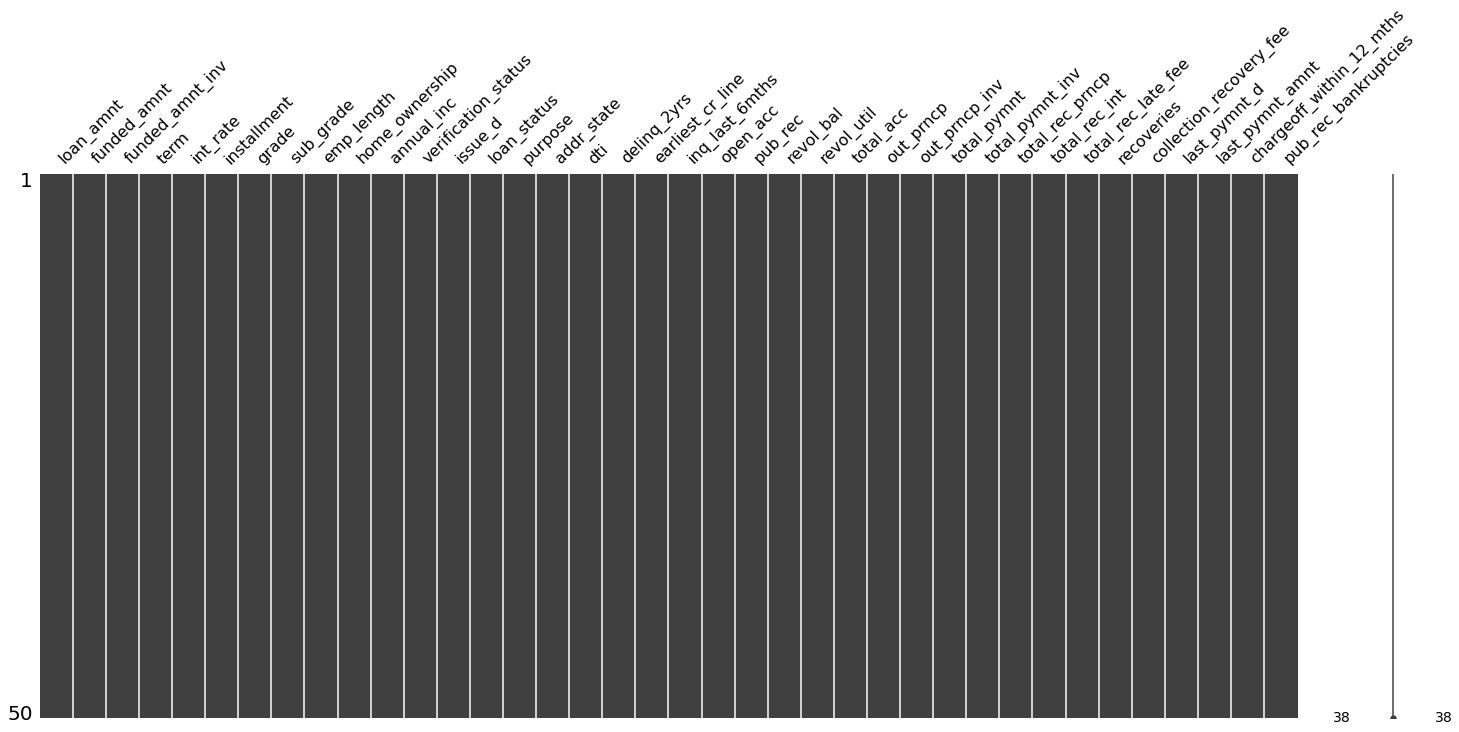

In [43]:
msno.matrix(data.sample(50))

<AxesSubplot:>

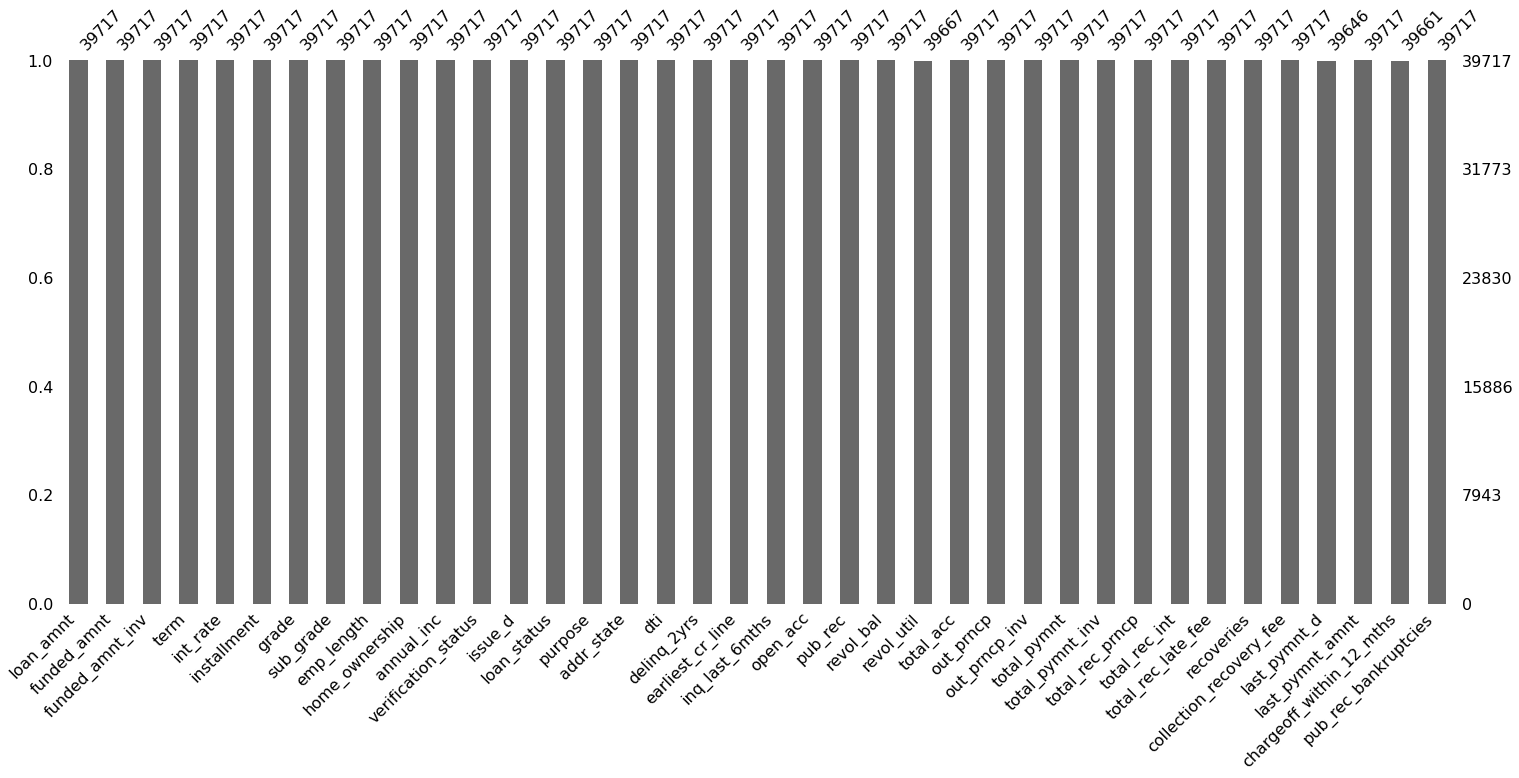

In [44]:
msno.bar(data)

In [45]:
data.shape

(39717, 38)

#### Chargeoff_within_12_mths column values are 0.

In [46]:
data.chargeoff_within_12_mths.isna().value_counts()

False    39661
True        56
Name: chargeoff_within_12_mths, dtype: int64

In [47]:
data.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [48]:
data[data.chargeoff_within_12_mths.isna()]['loan_status'].value_counts()

Fully Paid     50
Charged Off     6
Name: loan_status, dtype: int64

### Missing values in this column are mostly Fully Paid customers only. we can drop this column
### From this column we see that all charge off except missing value are happened after 12 months of the loan issue

In [49]:
data.drop(['chargeoff_within_12_mths'], axis=1, inplace=True)

<AxesSubplot:>

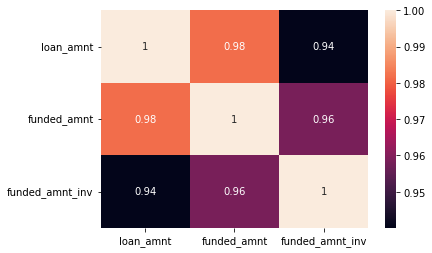

In [50]:
sns.heatmap(data[['loan_amnt','funded_amnt','funded_amnt_inv']].corr(), annot=True)

#### loan_amnt, funded_amnt, funded_amnt_inv columns are highly correlated and values more or less similar only. we can drop funded_amnt and funded_amnt_inv

In [51]:
data.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)

In [52]:
data.shape

(39717, 35)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   term                     39717 non-null  object 
 2   int_rate                 39717 non-null  object 
 3   installment              39717 non-null  float64
 4   grade                    39717 non-null  object 
 5   sub_grade                39717 non-null  object 
 6   emp_length               39717 non-null  object 
 7   home_ownership           39717 non-null  object 
 8   annual_inc               39717 non-null  float64
 9   verification_status      39717 non-null  object 
 10  issue_d                  39717 non-null  object 
 11  loan_status              39717 non-null  object 
 12  purpose                  39717 non-null  object 
 13  addr_state               39717 non-null  object 
 14  dti             

In [54]:
cont_data=data.select_dtypes(include=np.number)

### Analysing Categorical variables

In [55]:
data = data[['loan_amnt','term','int_rate','grade','sub_grade', 'emp_length', 'home_ownership','verification_status',
                'issue_d','loan_status','purpose','addr_state','earliest_cr_line','revol_util','last_pymnt_d',
                 'pub_rec_bankruptcies']]

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   loan_amnt             39717 non-null  int64 
 1   term                  39717 non-null  object
 2   int_rate              39717 non-null  object
 3   grade                 39717 non-null  object
 4   sub_grade             39717 non-null  object
 5   emp_length            39717 non-null  object
 6   home_ownership        39717 non-null  object
 7   verification_status   39717 non-null  object
 8   issue_d               39717 non-null  object
 9   loan_status           39717 non-null  object
 10  purpose               39717 non-null  object
 11  addr_state            39717 non-null  object
 12  earliest_cr_line      39717 non-null  object
 13  revol_util            39667 non-null  object
 14  last_pymnt_d          39646 non-null  object
 15  pub_rec_bankruptcies  39717 no

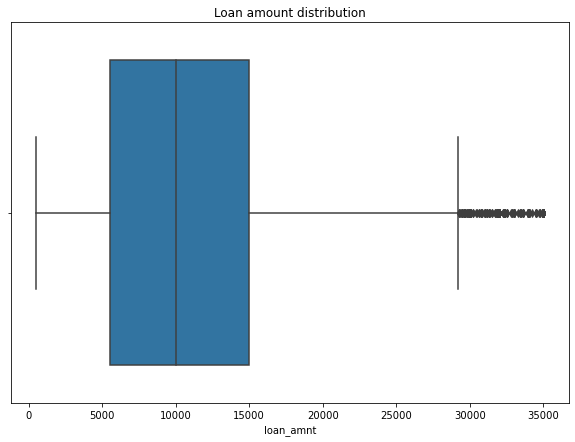

In [57]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data.loan_amnt)
plt.title("Loan amount distribution")
plt.show()

<AxesSubplot:>

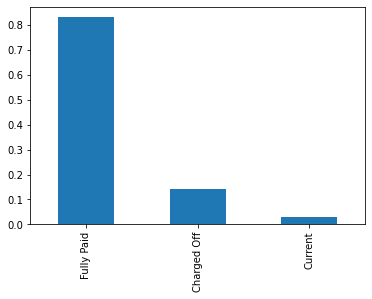

In [58]:
#Percentage of charged off
data.loan_status.value_counts(normalize=True).plot.bar()

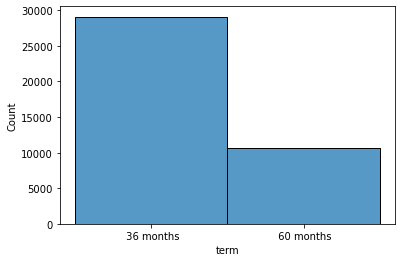

In [59]:
sns.histplot(x=data.term)
plt.show()

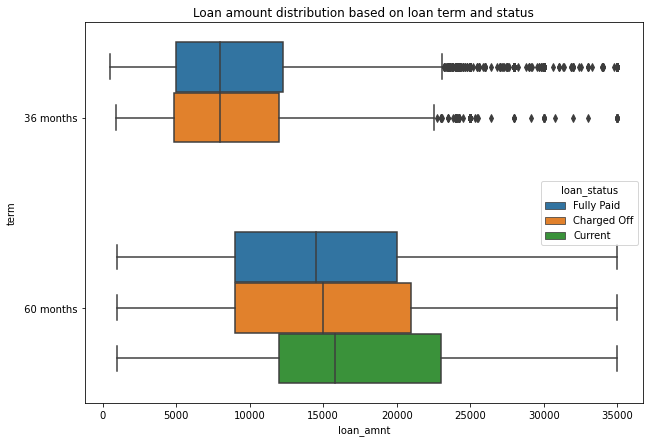

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data.loan_amnt, y= data.term, hue=data.loan_status)
plt.title("Loan amount distribution based on loan term and status")
plt.show()

In [61]:
### Converting interest rate value to float.
data.int_rate = data.int_rate.map(lambda x : float(x.strip('%')))

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\220047615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.int_rate = data.int_rate.map(lambda x : float(x.strip('%')))


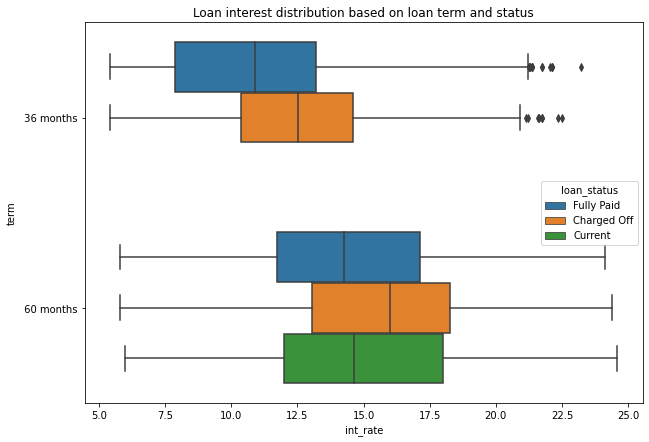

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data.int_rate, y= data.term, hue=data.loan_status)
plt.title("Loan interest distribution based on loan term and status")
plt.show()

### We can clearly see the interest rate on 60 months terms are very high

Text(0.5, 1.0, 'Percentage of Charge off, Current, Fully Paid loans with respect to loan term')

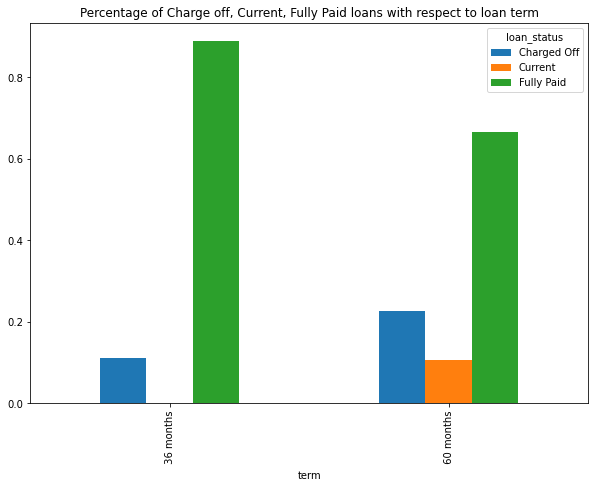

In [63]:
# group by term months and check the percentage of charge off in each term
term = data.groupby(['term'])['loan_status'].value_counts(normalize=True).unstack()
term.plot.bar(figsize=(10,7))
plt.title("Percentage of Charge off, Current, Fully Paid loans with respect to loan term")

In [64]:
term

loan_status,Charged Off,Current,Fully Paid
term,,,
36 months,0.110909,NaN,0.889091
60 months,0.225967,0.107335,0.666698


#### Charges off are more in 60 months loan term (22%), 36 months 11% charge off are there

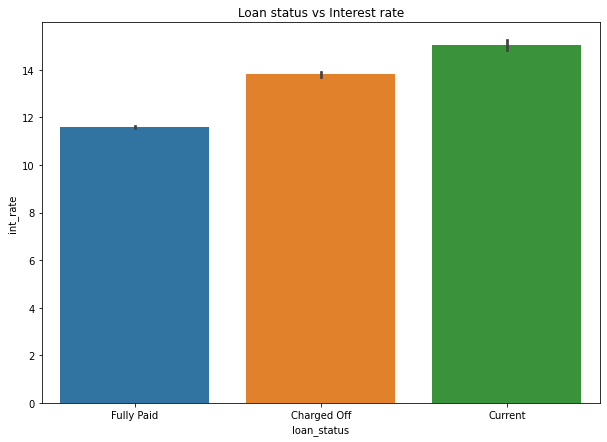

In [65]:
plt.figure(figsize=(10,7))
sns.barplot(y=data.int_rate,x=data.loan_status)
plt.title("Loan status vs Interest rate")
plt.show()

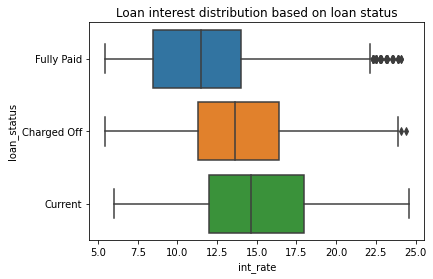

In [66]:
sns.boxplot(x=data.int_rate, y=data.loan_status)
plt.title("Loan interest distribution based on loan status")
plt.show()

#### Lets create bins of interest rate and check if interset rate is a factor of charge off

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\415304582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['int_ranges'] = pd.cut(x=data['int_rate'], bins=[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 25.0])


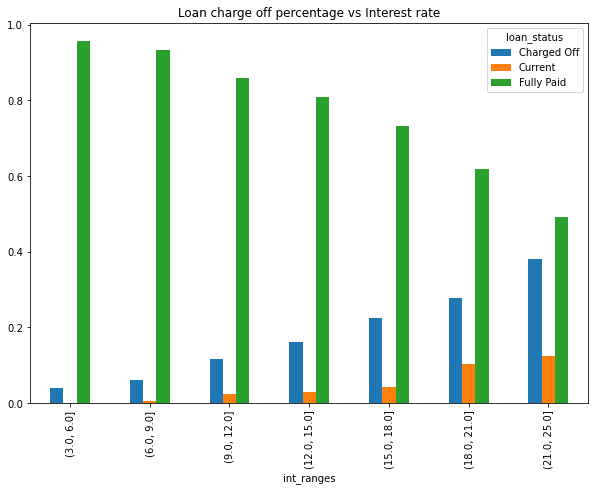

In [67]:
data['int_ranges'] = pd.cut(x=data['int_rate'], bins=[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 25.0])
data.groupby(['int_ranges'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))
plt.title("Loan charge off percentage vs Interest rate")
plt.show()

#### Mostly of the charge off are happening if interst rate is high.

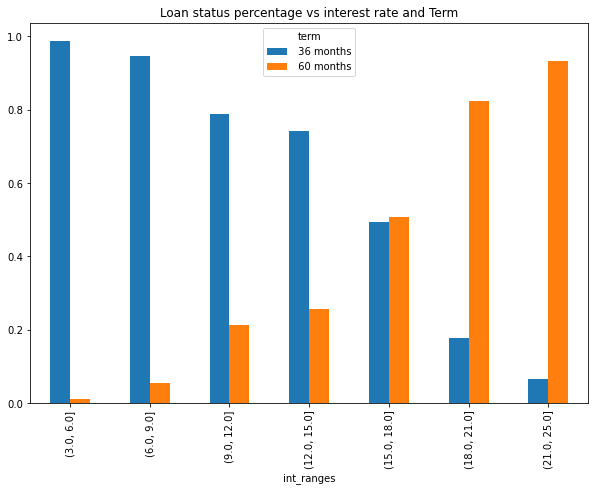

In [68]:
data.groupby(['int_ranges'])['term'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))
plt.title("Loan status percentage vs interest rate and Term")
plt.show()

#### As interest rate percentage of 30 months term loans are decreasing and 60 months term loans are increasing.

#### We can clearly see if interest rate is more than 15% term of the loan with 60months is higher. It means they end up paying more interest hence charged off

### We can clearly say Interest rate and loan term is a strong factor of charge off.

#### Lets see if loan grade has any effect on charge off

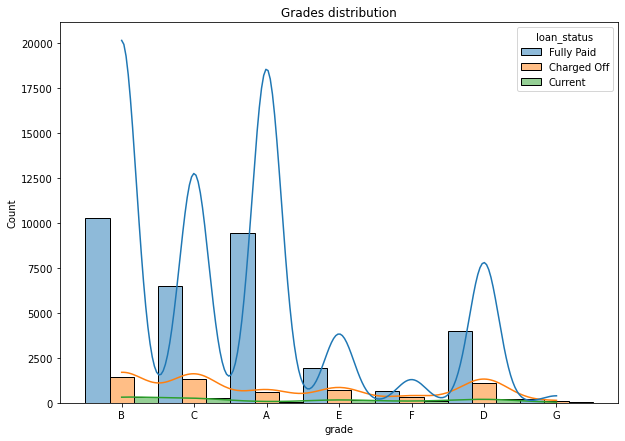

In [69]:
plt.figure(figsize=(10,7))
sns.histplot(x=data.grade, kde=True, hue=data.loan_status, multiple='dodge')
plt.title("Grades distribution")
plt.show()

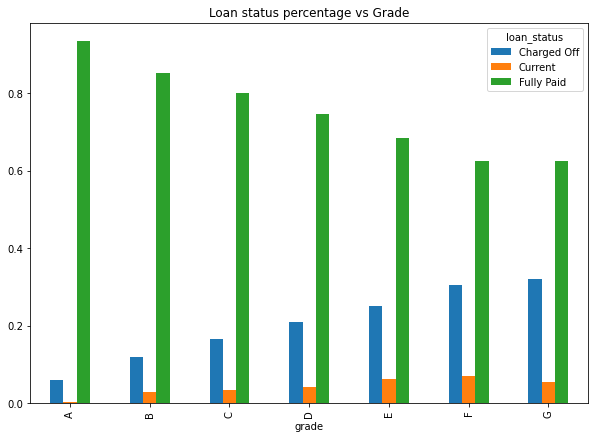

In [70]:
data.groupby(['grade'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))
plt.title("Loan status percentage vs Grade")
plt.show()

#### Grade B, C, D seems to have high number of charge offs

#### Lets see why some grade of loans have high charge off

In [71]:
data.groupby(['grade'])['int_ranges'].value_counts().unstack()

,"(3.0, 6.0]","(6.0, 9.0]","(9.0, 12.0]","(12.0, 15.0]","(15.0, 18.0]","(18.0, 21.0]","(21.0, 25.0]"
grade,,,,,,,
A,1331,8330,424,0,0,0,0
B,5,172,10340,1503,0,0,0
C,4,0,346,7141,607,0,0
D,4,0,9,1520,3608,166,0
E,4,0,0,54,1735,1049,0
F,0,0,0,0,67,753,229
G,0,0,0,0,1,154,161


#### Number of loan accounts with high interest are more in Grade B, C, D and E

#### Lets see if loan sub-grade has any effect on charge off

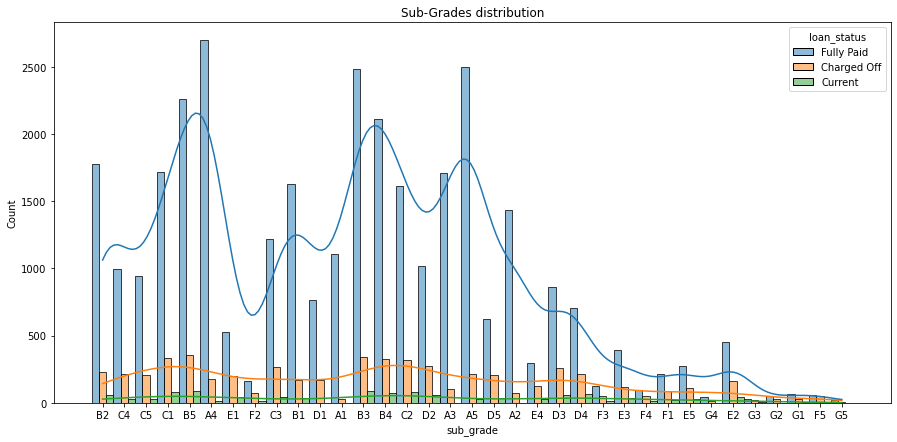

In [72]:
plt.figure(figsize=(15,7))
sns.histplot(x=data.sub_grade, kde=True, hue=data.loan_status, multiple='dodge')
plt.title("Sub-Grades distribution")
plt.show()

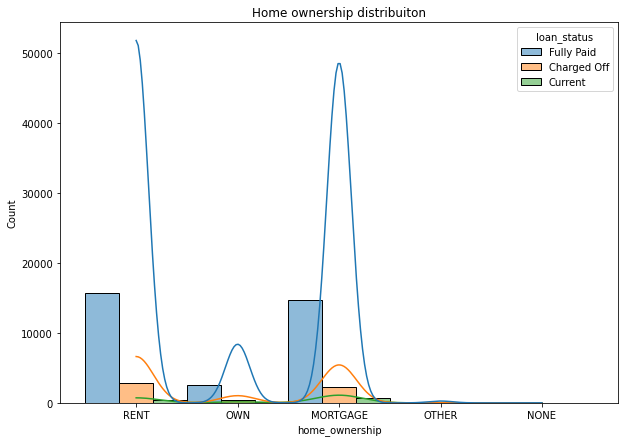

In [73]:
plt.figure(figsize=(10,7))
sns.histplot(x=data.home_ownership, kde=True, hue=data.loan_status, multiple='dodge')
plt.title("Home ownership distribuiton")
plt.show()

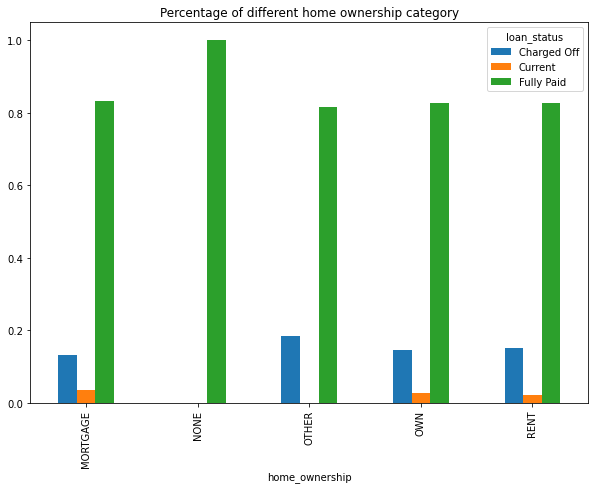

In [74]:
data.groupby(['home_ownership'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))
plt.title("Percentage of different home ownership category")
plt.show()

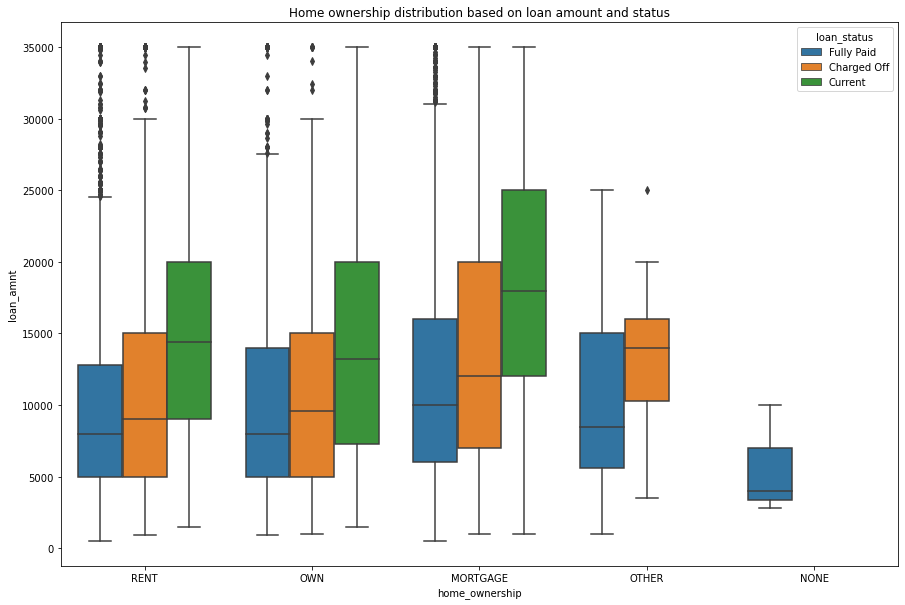

In [75]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data.home_ownership, y=data.loan_amnt, hue=data.loan_status)
plt.title("Home ownership distribution based on loan amount and status")
plt.show()

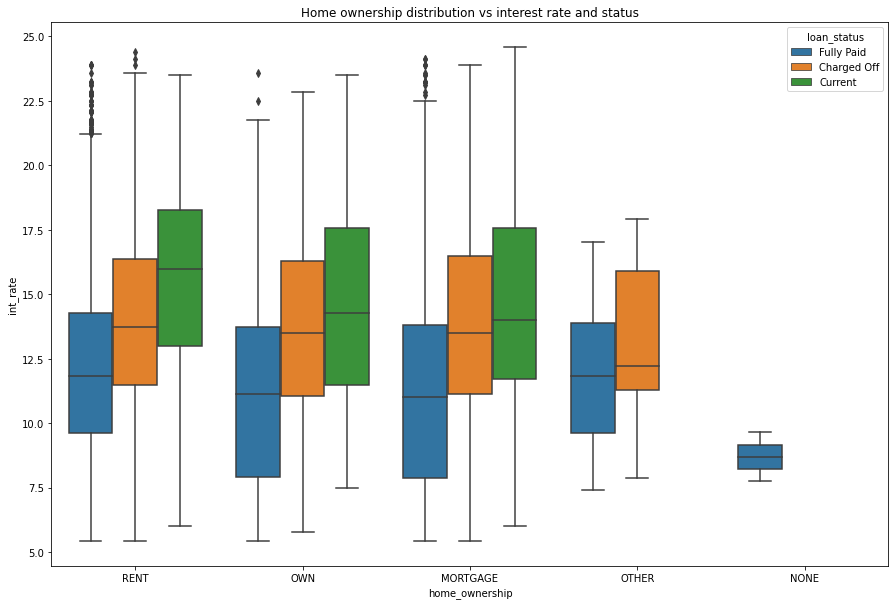

In [76]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data.home_ownership, y=data.int_rate, hue=data.loan_status)
plt.title("Home ownership distribution vs interest rate and status")
plt.show()

In [77]:
house_status = data.groupby(['home_ownership'])['loan_status'].value_counts(normalize=False).unstack()
house_status

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2327.0,638.0,14694.0
NONE,NaN,NaN,3.0
OTHER,18.0,NaN,80.0
OWN,443.0,83.0,2532.0
RENT,2839.0,419.0,15641.0


In [78]:
house_status.loc['RENT/MOR'] = house_status.loc['MORTGAGE'] + house_status.loc['RENT']
house_status.loc['OTHER/NONE'] = house_status.loc['OTHER'] + house_status.loc['NONE']
house_status = house_status.T.drop(columns=['MORTGAGE','RENT', 'OTHER','NONE'], axis=1).reset_index()
house_status.OWN = house_status.OWN/house_status.OWN.sum()
house_status['RENT/MOR'] = house_status['RENT/MOR']/house_status['RENT/MOR'].sum()
house_status['OTHER/NONE'] = house_status['OTHER/NONE']/house_status['OTHER/NONE'].sum()
house_status

home_ownership,loan_status,OWN,RENT/MOR,OTHER/NONE
0,Charged Off,0.144866,0.141310,NaN
1,Current,0.027142,0.028913,NaN
2,Fully Paid,0.827992,0.829777,1.0


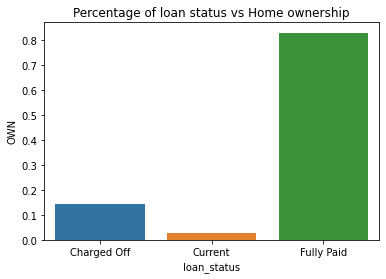

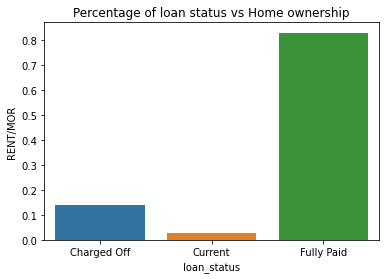

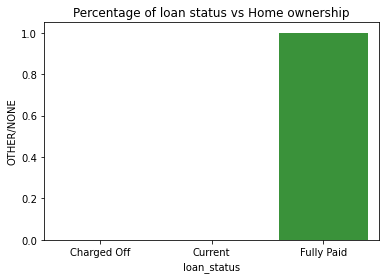

In [79]:
for i in range(1,len(house_status.columns)):
    sns.barplot(x=house_status.loan_status, y=house_status[house_status.columns[i]])
    plt.title("Percentage of loan status vs Home ownership")
    plt.show()

#### Percentage of charge offs are almost same for RENT\MORTGAGE and OWN

#### Lets If loan purpose has any effect on charge off

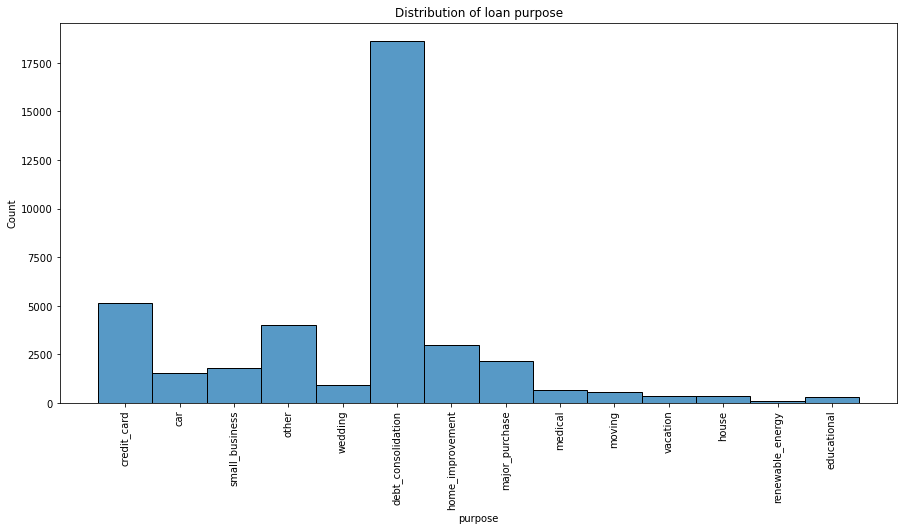

In [80]:
plt.figure(figsize=(15,7))
plot = sns.histplot(data.purpose)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title("Distribution of loan purpose")
plt.show()

#### Large amount of loans are taken for debt consolidation.

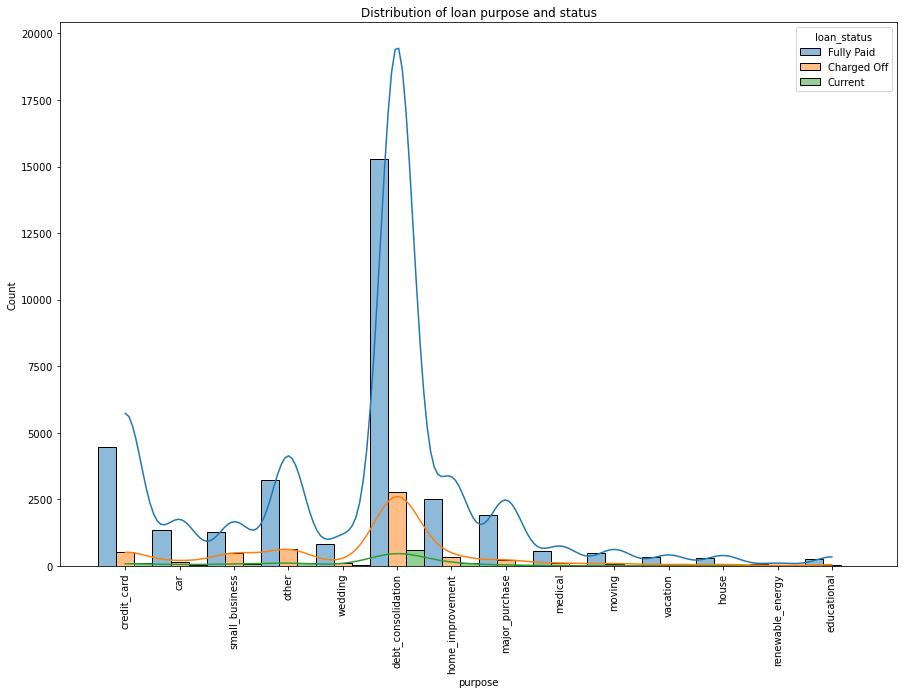

In [81]:
plt.figure(figsize=(15,10))
plot = sns.histplot(x=data.purpose, kde=True, hue=data.loan_status, multiple='dodge')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title("Distribution of loan purpose and status")
plt.show()

#### Number of Charge off are high in debt_consolidation loans only

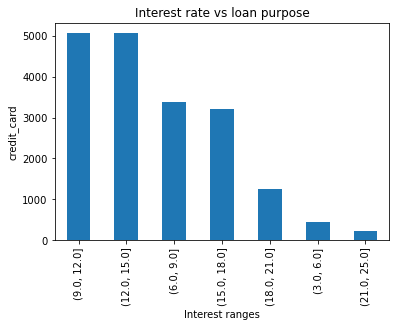

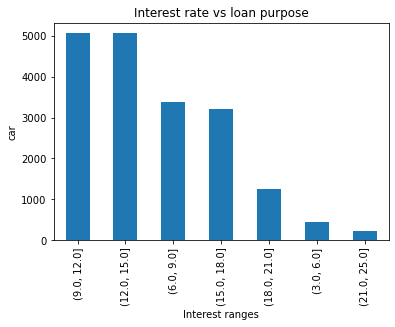

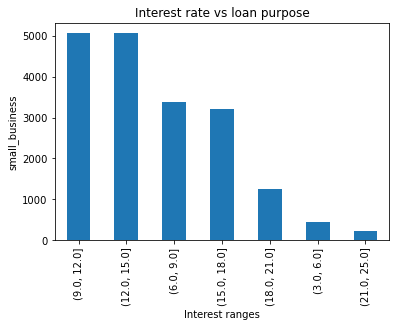

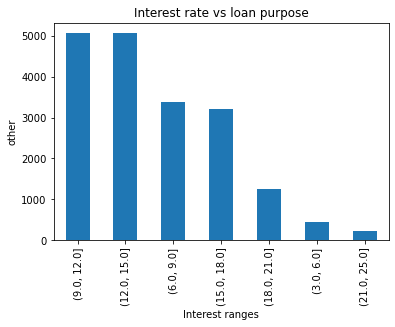

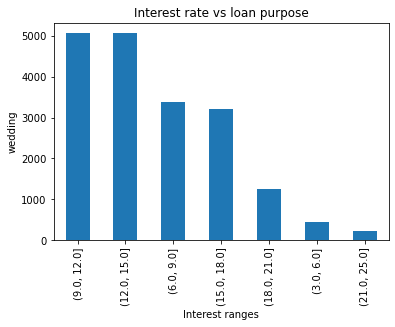

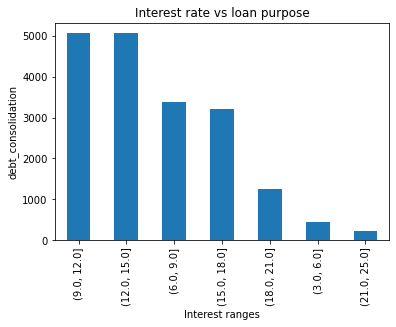

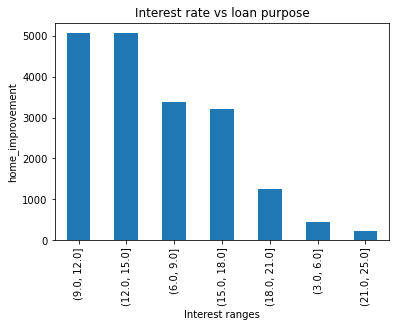

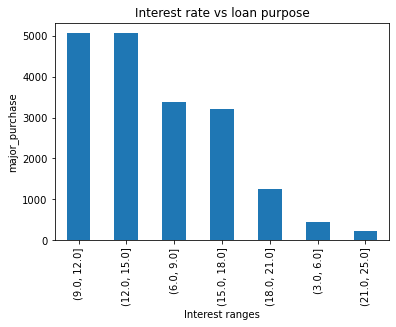

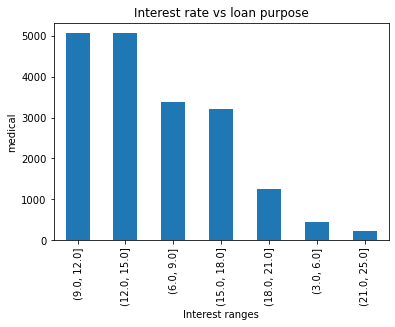

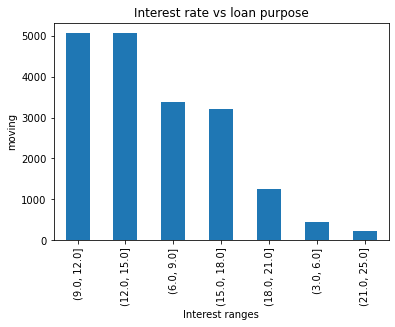

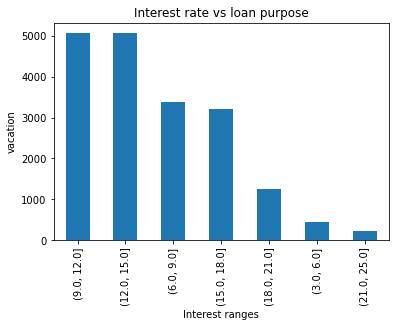

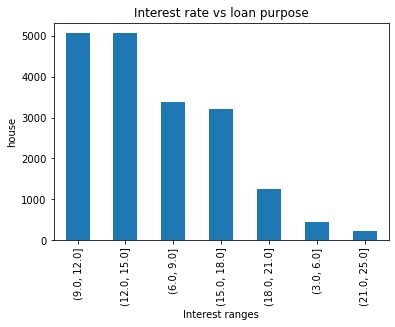

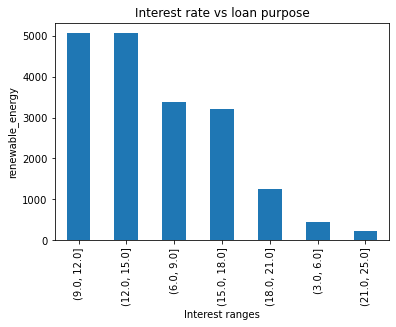

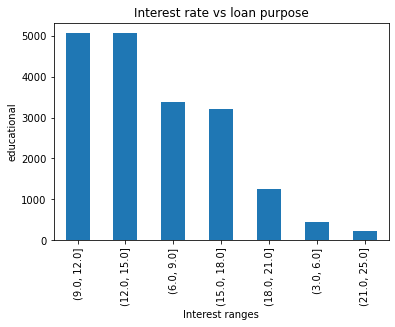

In [82]:
for i in data.purpose.unique():
    ax = data[data.purpose=='debt_consolidation']['int_ranges'].value_counts().plot.bar()
    ax.set(xlabel='Interest ranges', ylabel=i)
    plt.title("Interest rate vs loan purpose")
    plt.show()

#### Interest rates between 9 to 15 have high number of loans, 3 to 6 & and 21 to 25% loans are less number.

#### Lets see which type of loan has more percentage of charge off

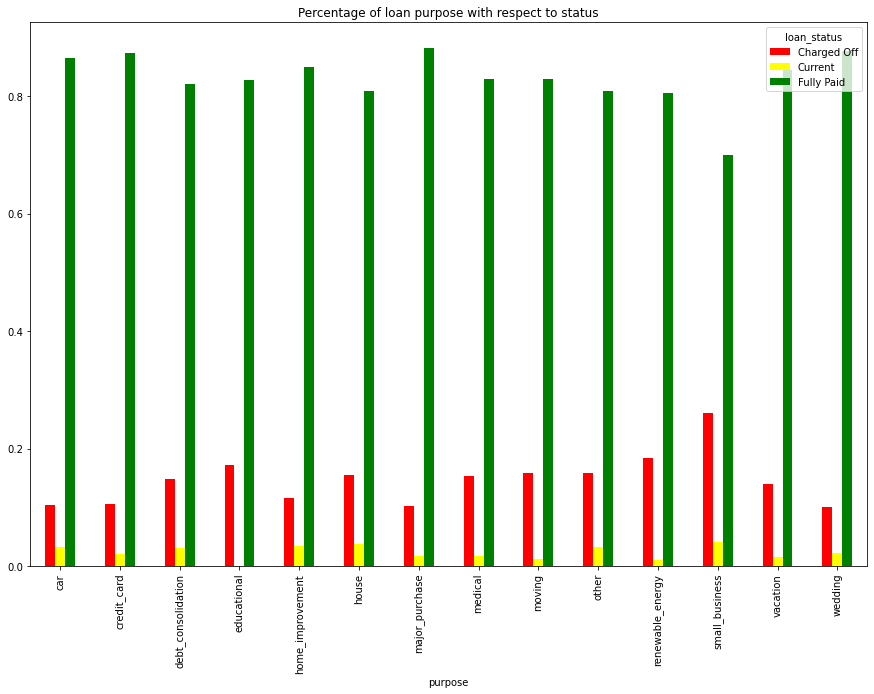

In [83]:
purpose_data = data.groupby(['purpose'])['loan_status'].value_counts(normalize=True).unstack()
purpose_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.title("Percentage of loan purpose with respect to status")
plt.show()

#### By analysing the purpose of loan, we can tell Small business loans have highest percentage of charge off's compared to other 

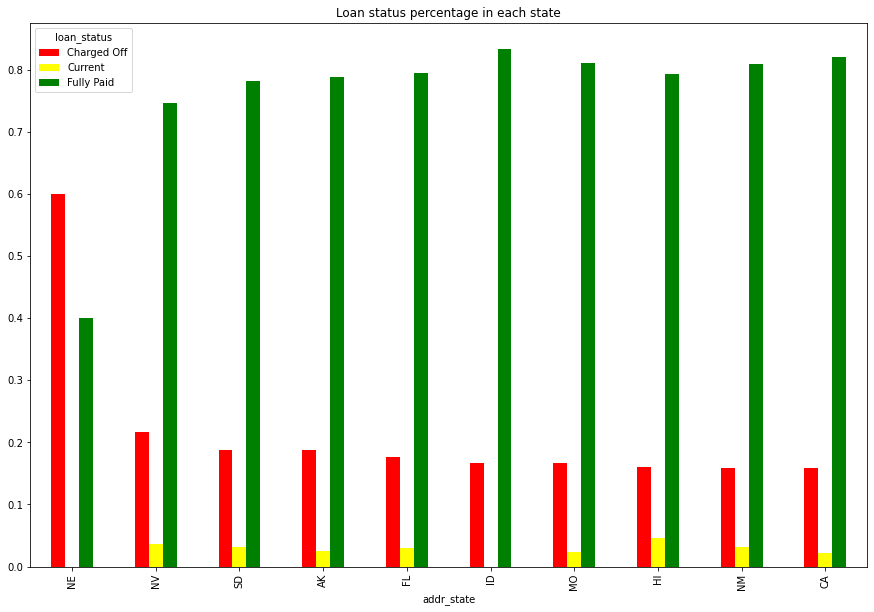

In [84]:
address_data = data.groupby(['addr_state'])['loan_status'].value_counts(normalize=True).unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.title("Loan status percentage in each state")
plt.show()

#### NE has the highest percentage of charge off's compared to other states

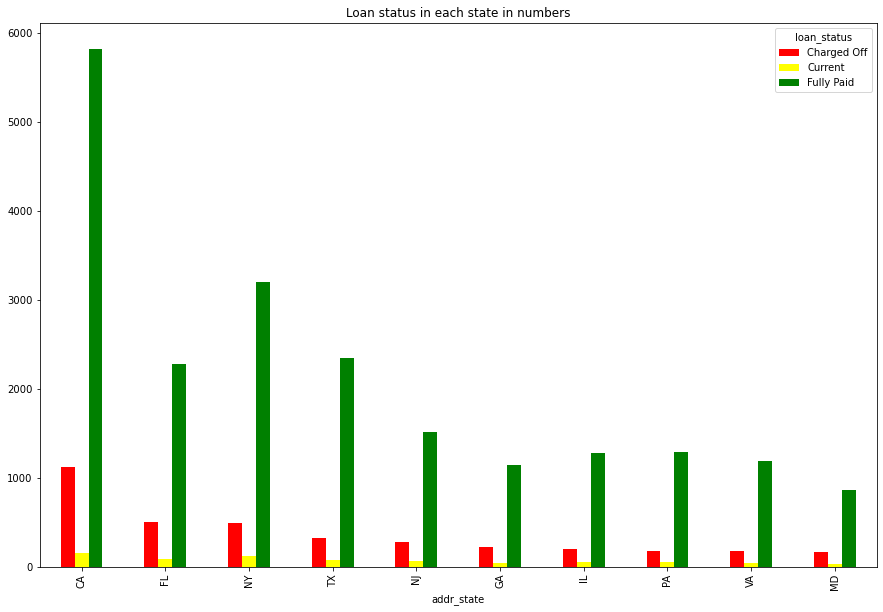

In [85]:
address_data = data.groupby(['addr_state'])['loan_status'].value_counts().unstack()
address_data = address_data.sort_values(by='Charged Off', ascending=False).head(10)
address_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.title("Loan status in each state in numbers")
plt.show()

#### If we look at the number of charge off's in each state instead of percentage, CA has large number of charge off's as well as Fully paid loans

In [86]:
data.earliest_cr_line.head()
def yearcon(x):
    year = x.split('-')[1]
    if int(year)>11:
        year = int('19'+year)
    else:
        year = int('20'+year)
    return year
data['earliest_cr_line_year'] = data.earliest_cr_line.map(yearcon)

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\1822196635.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['earliest_cr_line_year'] = data.earliest_cr_line.map(yearcon)


<AxesSubplot:xlabel='year_ranges'>

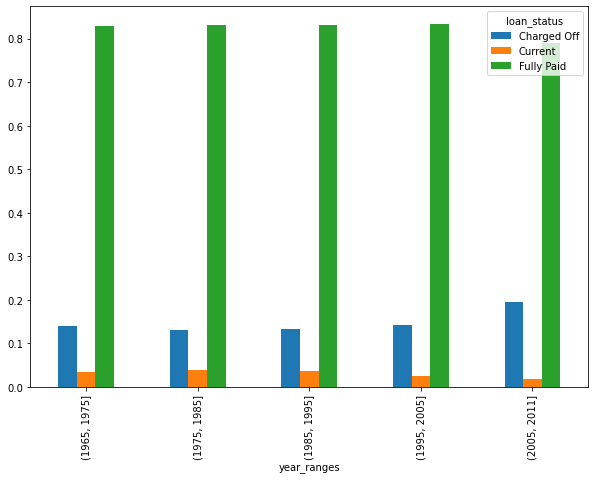

In [87]:
# create bins for credit line years and see if earliest credit line has any effect on loan status
cr_data = data[data['earliest_cr_line_year']<2011]
cr_data['year_ranges'] = pd.cut(x=cr_data['earliest_cr_line_year'], bins=[1965,1975, 1985, 1995, 2005, 2011])
cr_data.groupby(['year_ranges'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,7))

#### Earliest credit line from 1995 to 2011 have high slightly lower rate of charge off

#### Lets See if issue data has any effect on loan status

In [88]:
data['issue_date_format'] = data.issue_d.map(lambda x : datetime.strptime(x, '%b-%y'))
data.issue_date_format

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\143354829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_date_format'] = data.issue_d.map(lambda x : datetime.strptime(x, '%b-%y'))


id
1077501   2011-12-01
1077430   2011-12-01
1077175   2011-12-01
1076863   2011-12-01
1075358   2011-12-01
             ...    
92187     2007-07-01
90665     2007-07-01
90395     2007-07-01
90376     2007-07-01
87023     2007-06-01
Name: issue_date_format, Length: 39717, dtype: datetime64[ns]

In [89]:
date_format = data.groupby(['issue_date_format'])['loan_status', 'term'].value_counts().unstack()

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\3768013845.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  date_format = data.groupby(['issue_date_format'])['loan_status', 'term'].value_counts().unstack()


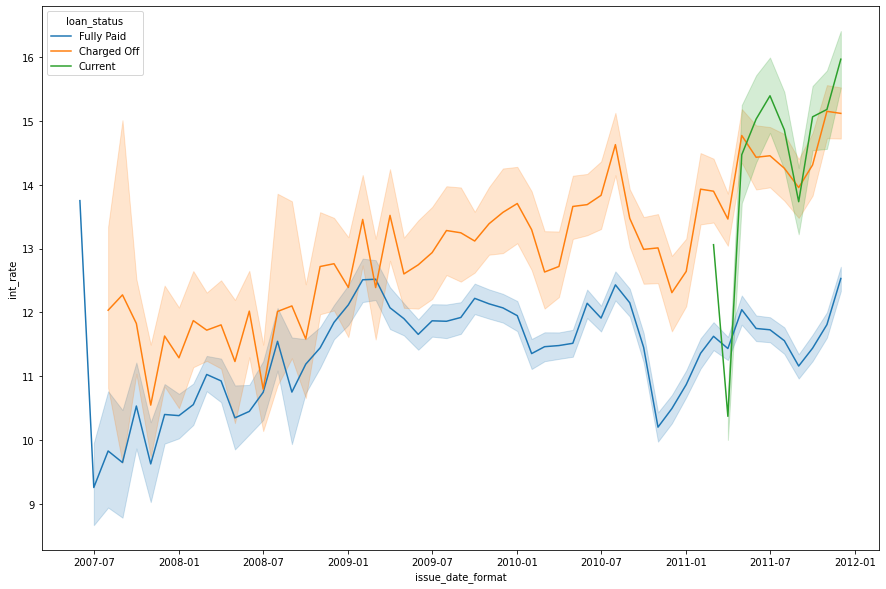

In [90]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=data.issue_date_format, y=data.int_rate, hue=data.loan_status)
plt.show()

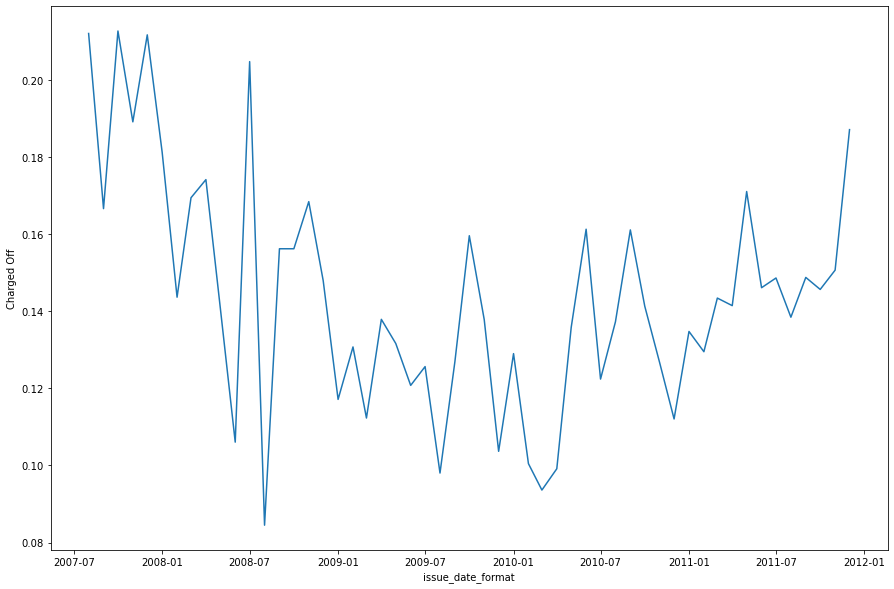

In [91]:
plt.figure(figsize=(15, 10))
issue_data = data.groupby(['issue_date_format'])['loan_status'].value_counts(normalize=True).unstack()
sns.lineplot(x=issue_data.index, y=issue_data['Charged Off'])
#sns.lineplot(x=issue_data.index, y=issue_data['Fully Paid'])
#sns.lineplot(x=issue_data.index, y=issue_data['Current'])
plt.show()

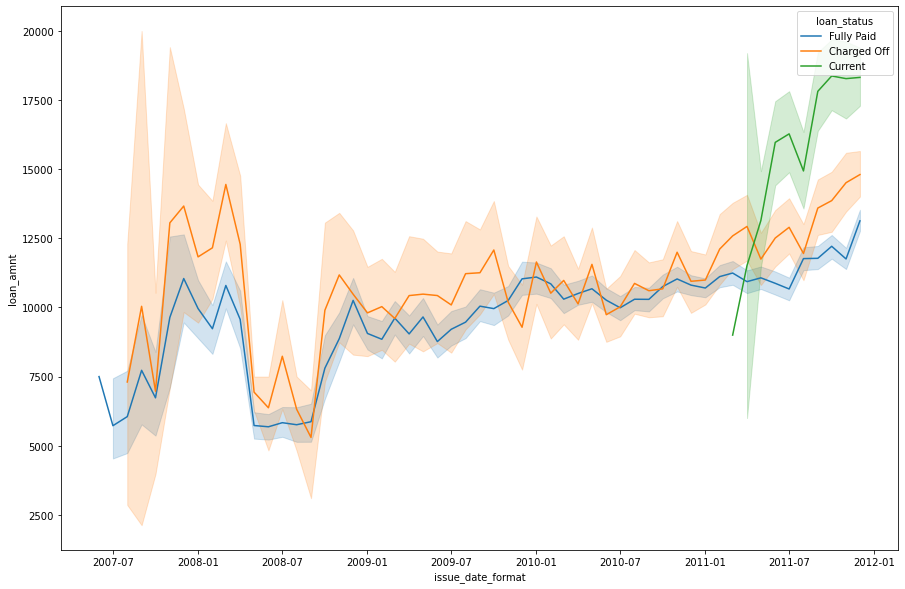

In [92]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=data.issue_date_format, y=data.loan_amnt, hue=data.loan_status)
plt.show()

<AxesSubplot:xlabel='issue_date_format', ylabel=' 36 months'>

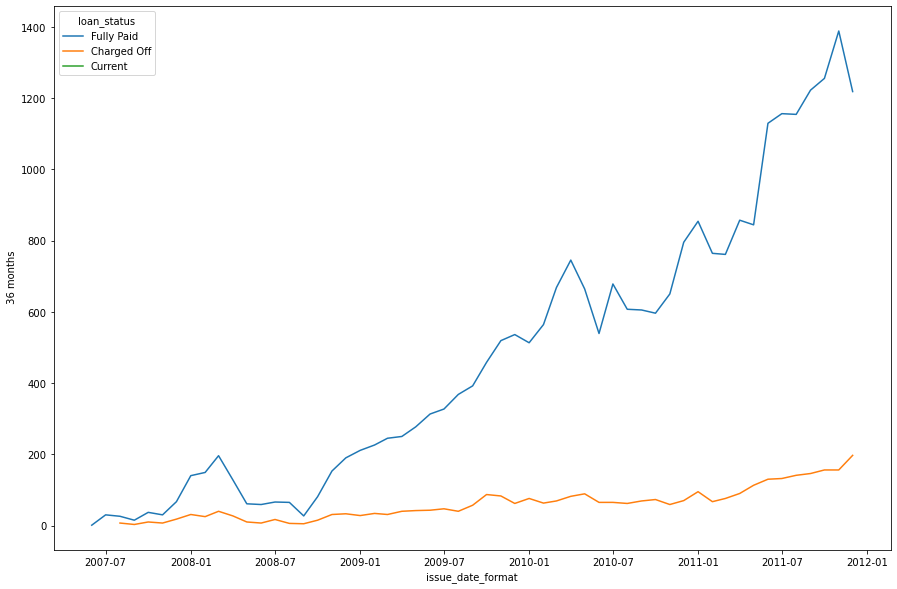

In [93]:
issue_data = data.groupby(['issue_date_format', 'loan_status'])['term'].value_counts().unstack().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(x=issue_data.issue_date_format, y=issue_data[' 36 months'], hue=issue_data.loan_status)

<AxesSubplot:xlabel='issue_date_format', ylabel=' 60 months'>

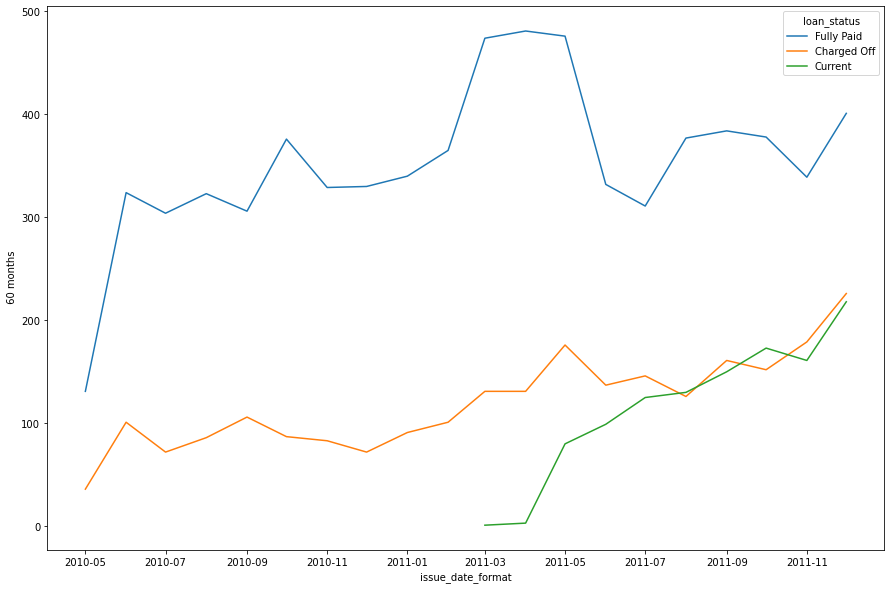

In [94]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=issue_data.issue_date_format, y=issue_data[' 60 months'], hue=issue_data.loan_status)

<AxesSubplot:xlabel='issue_date_format', ylabel='Not Verified'>

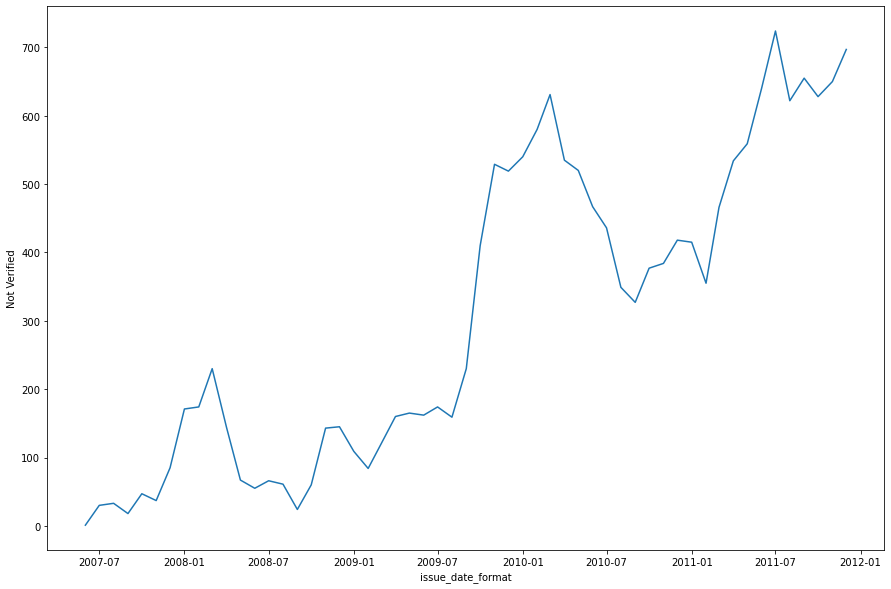

In [95]:
issue_data = data.groupby(['issue_date_format'])['verification_status'].value_counts().unstack()
plt.figure(figsize=(15, 10))
sns.lineplot(x=issue_data.index, y=issue_data['Not Verified'])

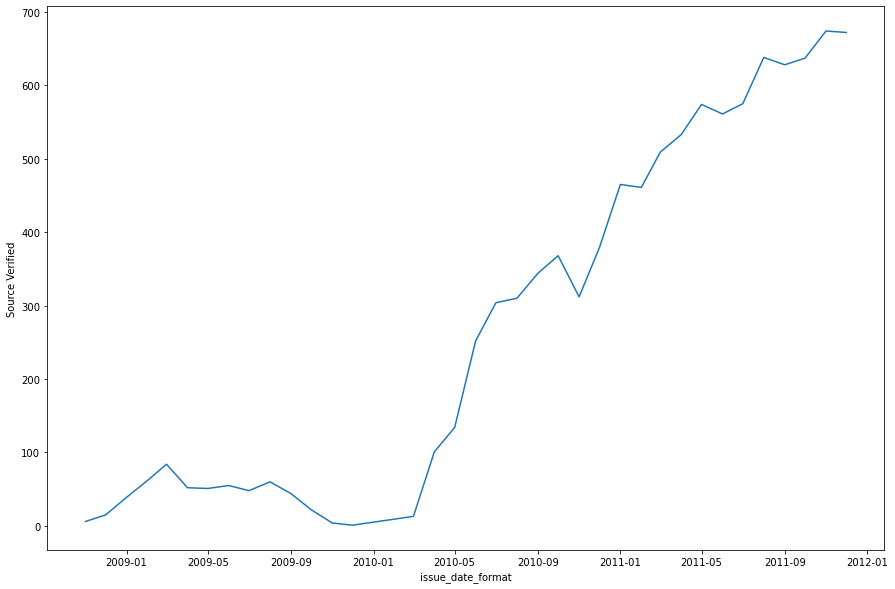

In [96]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=issue_data.index, y=issue_data['Source Verified'])
plt.show()

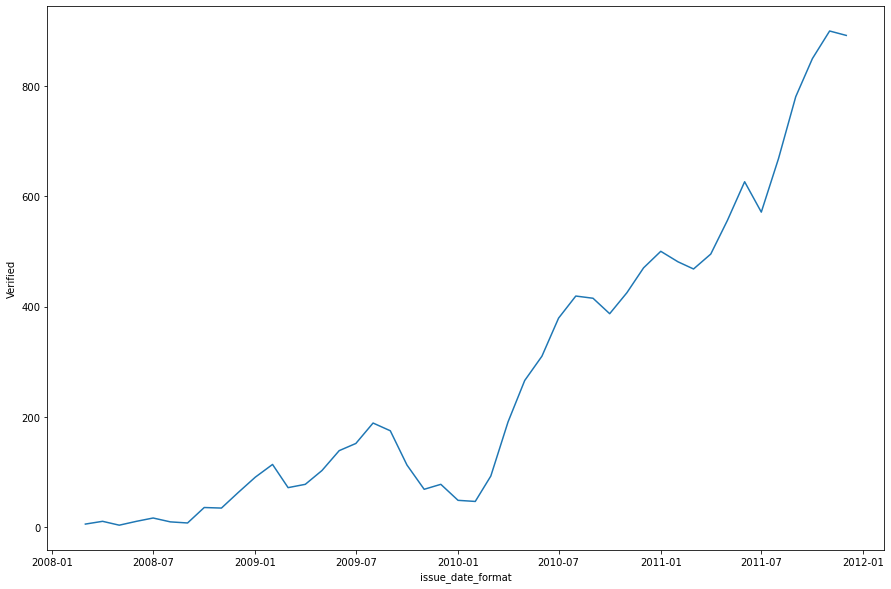

In [97]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=issue_data.index, y=issue_data['Verified'])
plt.show()

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\2254289743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_year'] = data.issue_d.map(yearcon)


<AxesSubplot:xlabel='issue_year', ylabel='int_rate'>

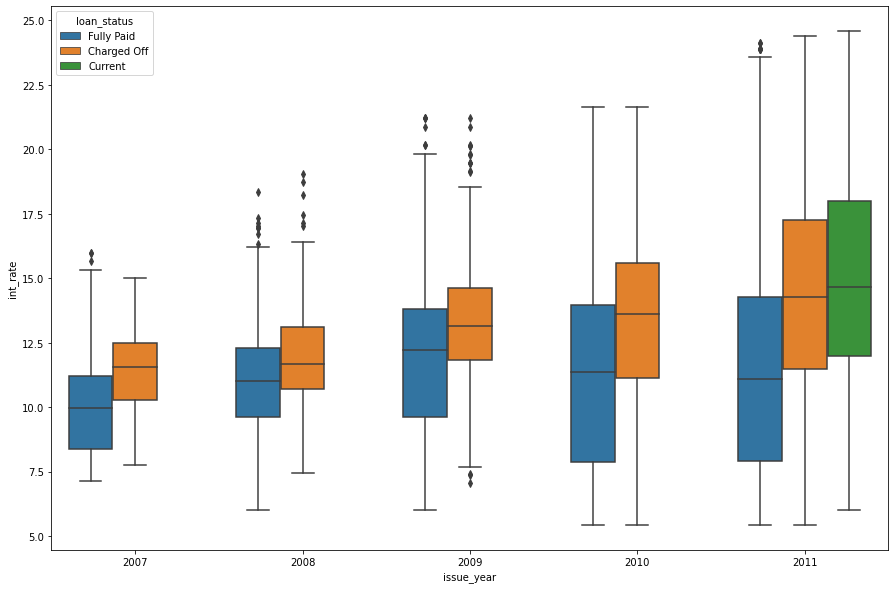

In [98]:
data['issue_year'] = data.issue_d.map(yearcon)
plt.figure(figsize=(15,10))
sns.boxplot(x=data.issue_year, y=data.int_rate, hue=data.loan_status)

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

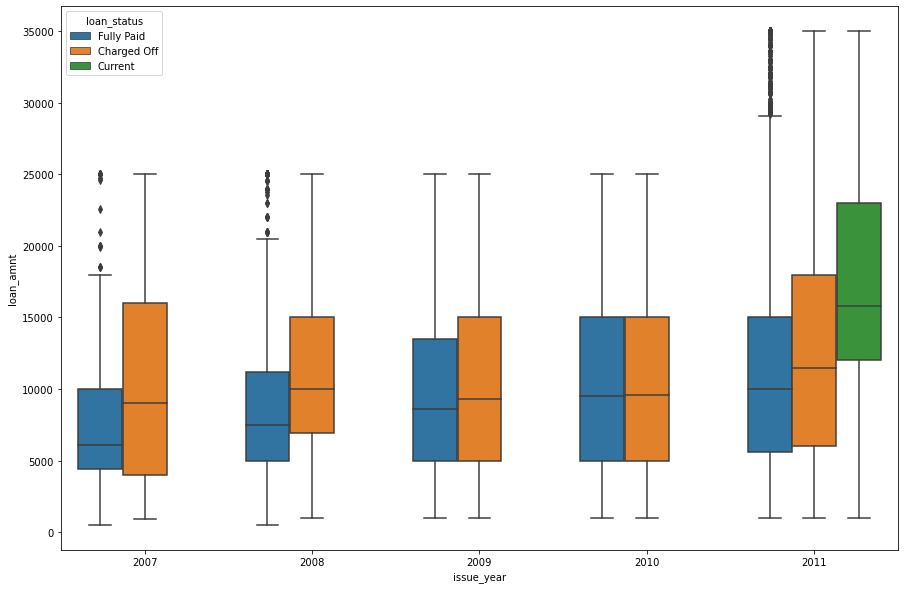

In [99]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=data.issue_year, y=data.loan_amnt, hue=data.loan_status)

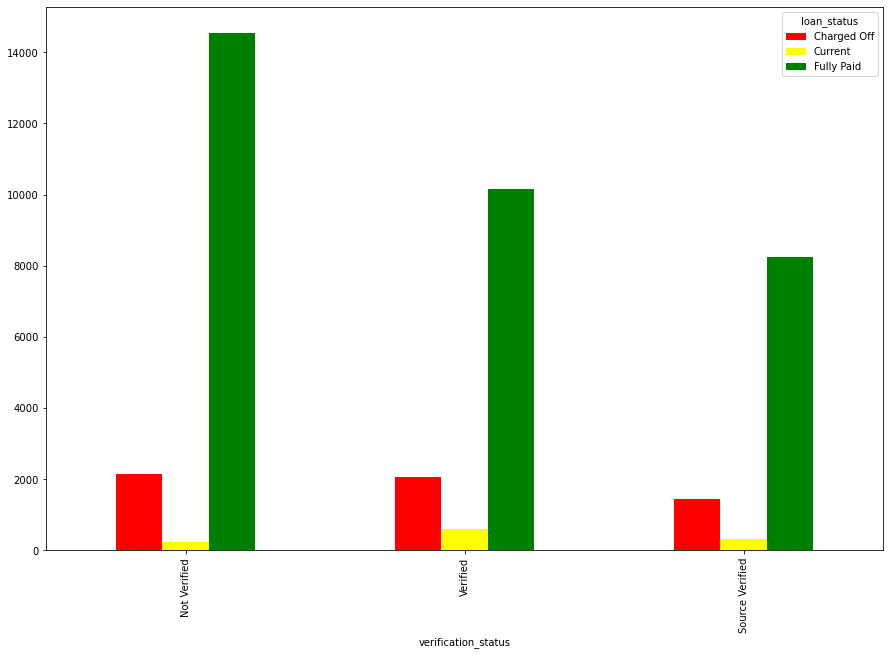

In [100]:
verification_data = data.groupby(['verification_status'])['loan_status'].value_counts().unstack()
verification_data = verification_data.sort_values(by='Charged Off', ascending=False).head(10)
verification_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.show()

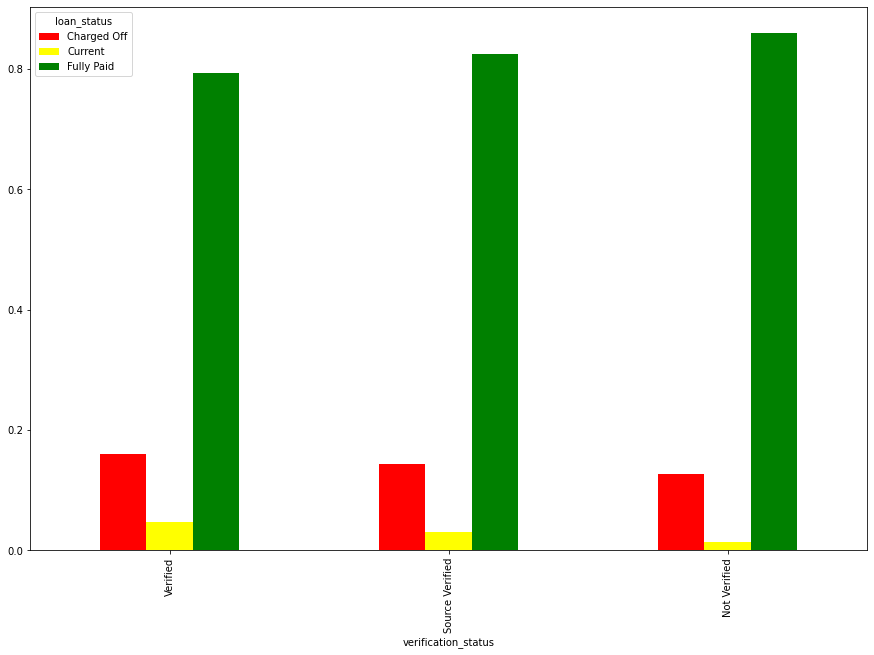

In [101]:
verification_data = data.groupby(['verification_status'])['loan_status'].value_counts(normalize=True).unstack()
verification_data = verification_data.sort_values(by='Charged Off', ascending=False).head(10)
verification_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.show()

In [102]:
verification_data = data.groupby(['verification_status'])['pub_rec_bankruptcies'].value_counts(normalize=True).unstack()
verification_data

pub_rec_bankruptcies,0.0,1.0,2.0,Unknown
verification_status,,,,
Not Verified,0.915076,0.043733,0.000059,0.041132
Source Verified,0.958847,0.040753,0.000401,NaN
Verified,0.958623,0.041143,0.000156,0.000078


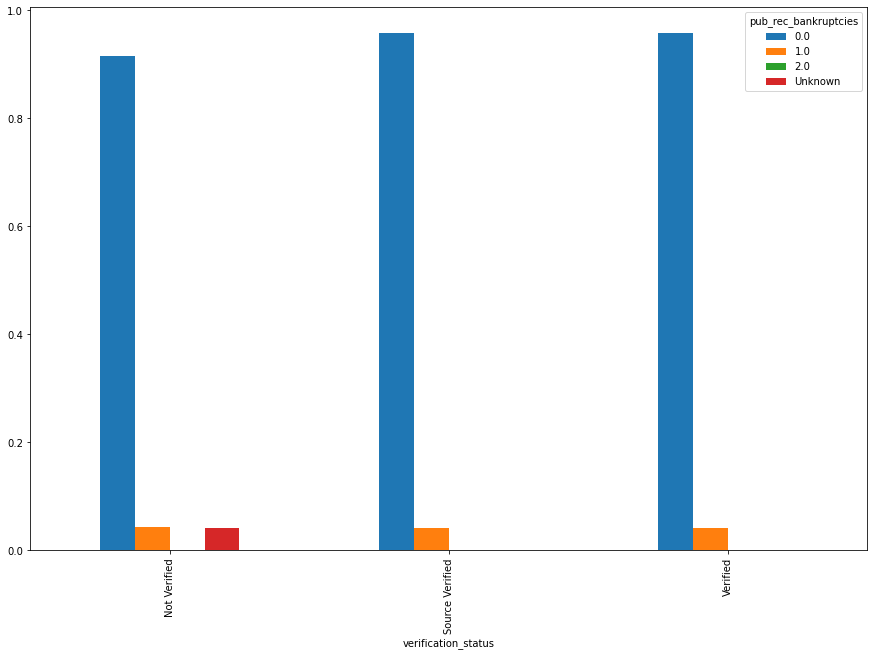

In [103]:
verification_data.plot.bar(figsize=(15, 10))
plt.show()

In [104]:
data.revol_util = data.revol_util.map(lambda x : float(x.strip('%')) if isinstance(x, str) else x)
data.revol_util.isna().value_counts()

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\1374156559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.revol_util = data.revol_util.map(lambda x : float(x.strip('%')) if isinstance(x, str) else x)


False    39667
True        50
Name: revol_util, dtype: int64

<AxesSubplot:xlabel='revol_util'>

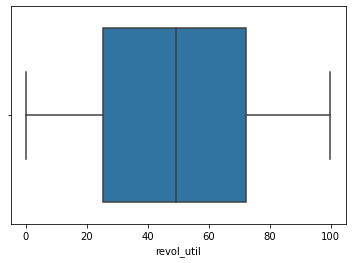

In [105]:
sns.boxplot(x=data.revol_util)

In [106]:
#### fillna in revol_util column with the median
data.revol_util.fillna(value=data.revol_util.median(), inplace=True)

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\3660873831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.revol_util.fillna(value=data.revol_util.median(), inplace=True)


<AxesSubplot:xlabel='revol_util', ylabel='Count'>

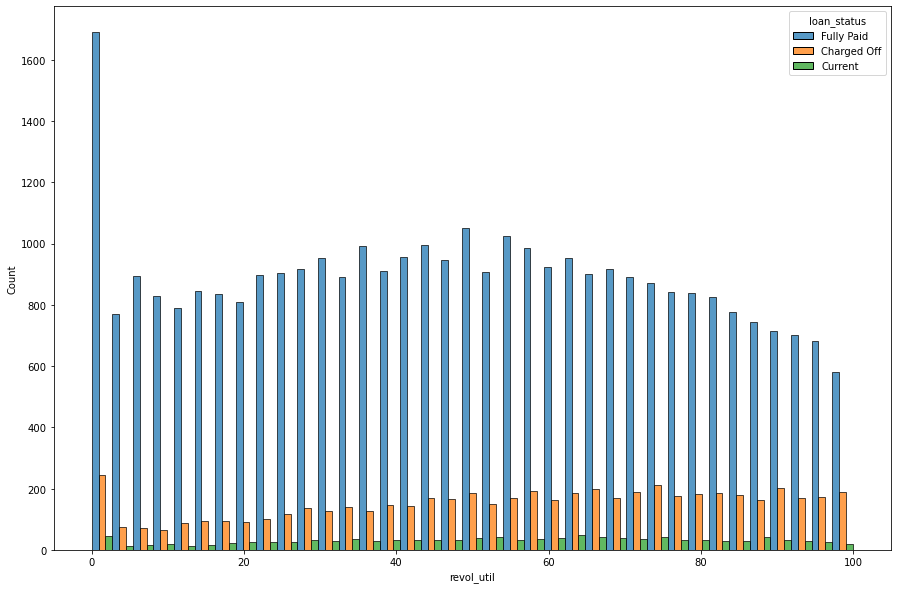

In [107]:
plt.figure(figsize=(15,10))
sns.histplot(x=data.revol_util, hue=data.loan_status, multiple='dodge')

<AxesSubplot:xlabel='revol_util', ylabel='loan_status'>

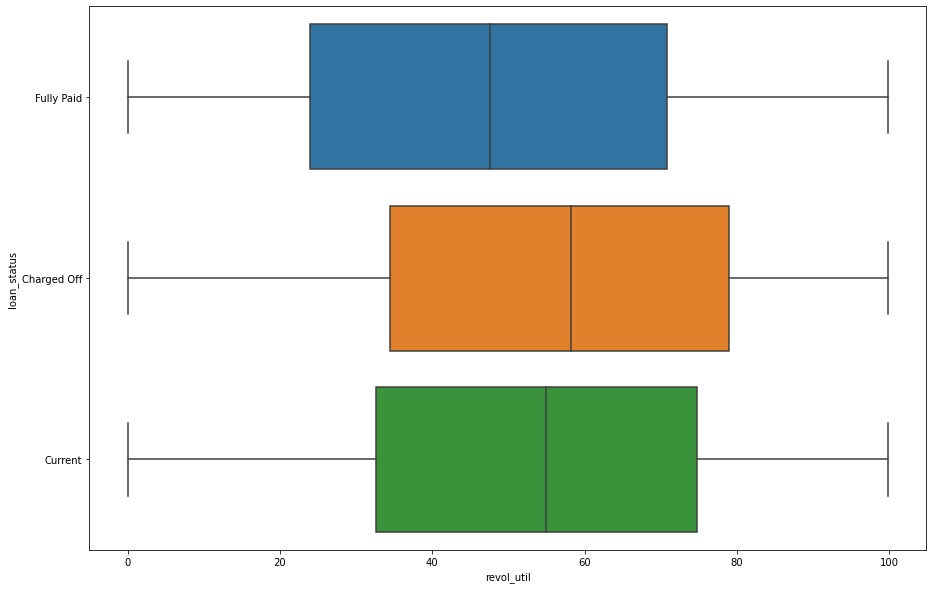

In [108]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data.revol_util, y=data.loan_status)

In [109]:
### Revol util is high for charged off's

<AxesSubplot:xlabel='home_ownership', ylabel='revol_util'>

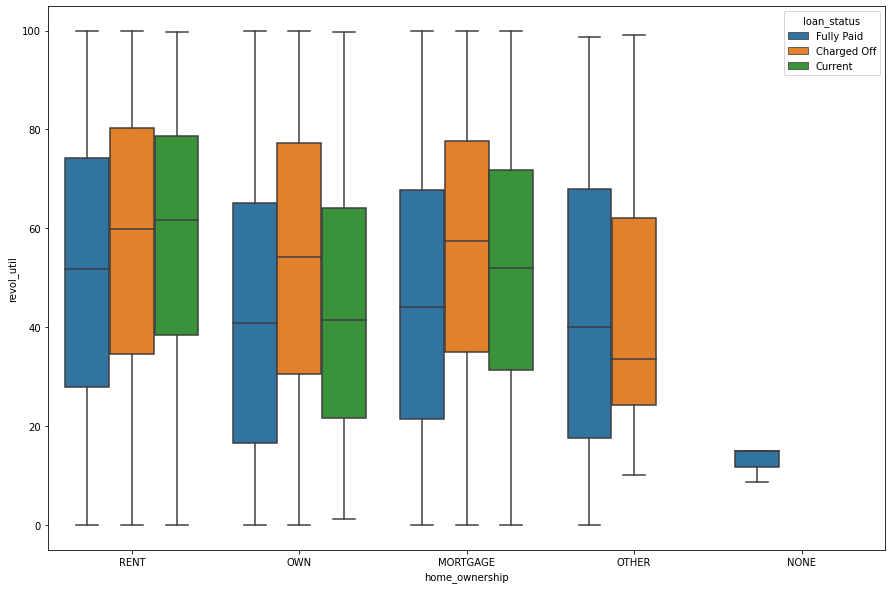

In [110]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data.home_ownership, y=data.revol_util, hue=data.loan_status)

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\717956359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.pub_rec_bankruptcies = data.pub_rec_bankruptcies.map(lambda x : str(x))


<AxesSubplot:xlabel='pub_rec_bankruptcies'>

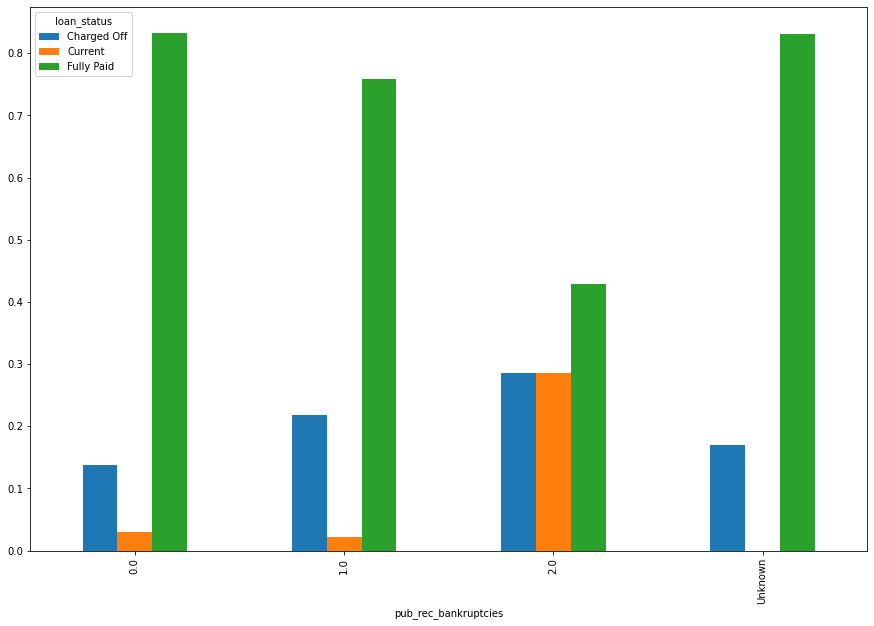

In [111]:
data.pub_rec_bankruptcies = data.pub_rec_bankruptcies.map(lambda x : str(x))
data.groupby(['pub_rec_bankruptcies'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(15, 10))

### Percentage of charge off is high for pub_rec_bankruptcies 2

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='int_rate'>

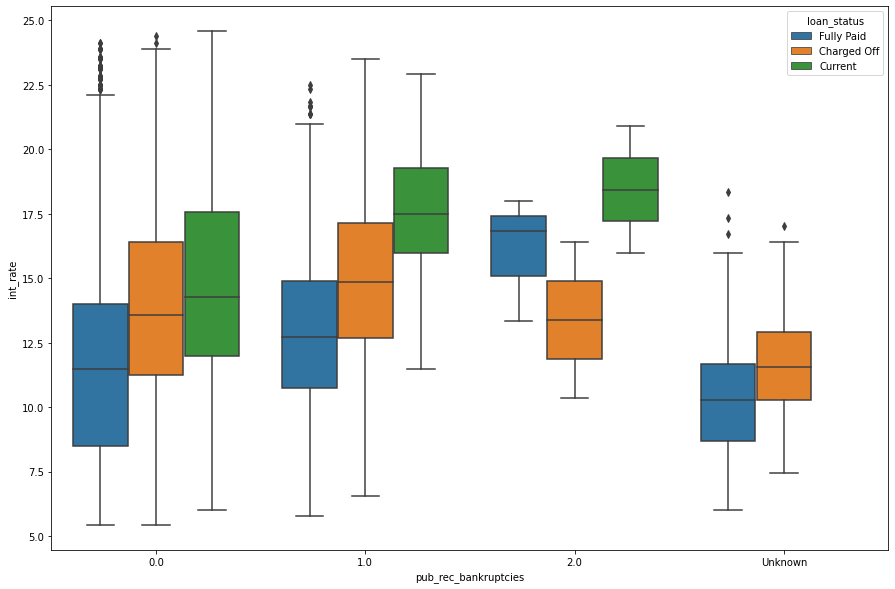

In [112]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data.pub_rec_bankruptcies, y=data.int_rate, hue=data.loan_status)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='loan_amnt'>

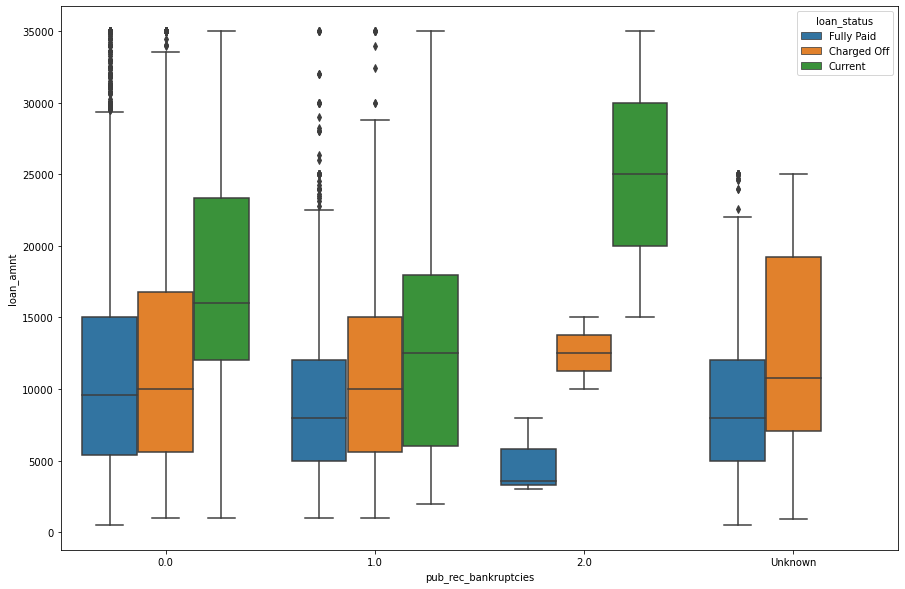

In [113]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data.pub_rec_bankruptcies, y=data.loan_amnt, hue=data.loan_status)

In [114]:
#### for pub_rec_bankruptcies 2, no.of loans are very less and percentage of charge off's are more.

C:\Users\gtpra\AppData\Local\Temp\ipykernel_14416\3894714239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'],format='%b-%y')


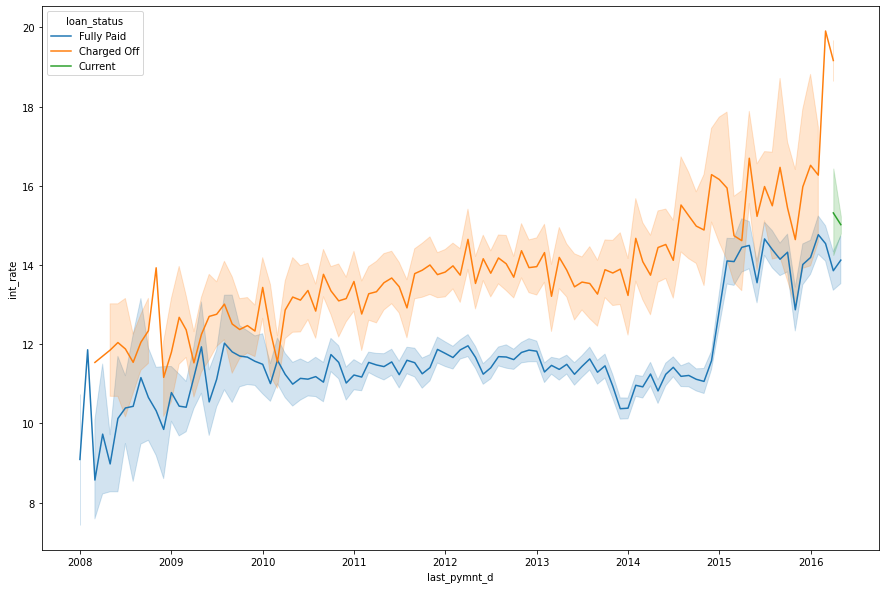

In [115]:
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'],format='%b-%y')
plt.figure(figsize=(15, 10))
sns.lineplot(x=data.last_pymnt_d, y=data.int_rate, hue=data.loan_status)
plt.show()

In [116]:
data[data.last_pymnt_d.isna()]['loan_status'].unique()

array(['Charged Off'], dtype=object)

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

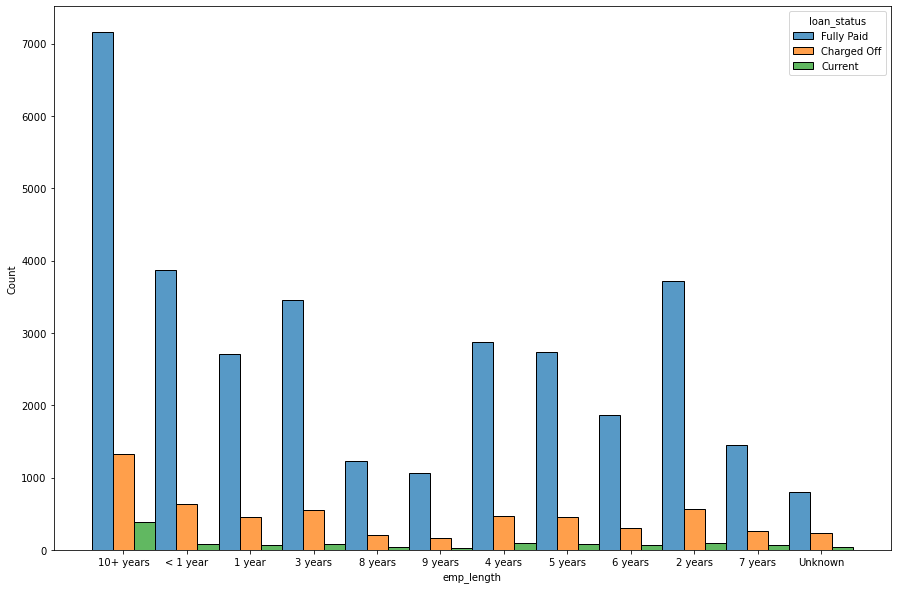

In [117]:
plt.figure(figsize=(15,10))
sns.histplot(x=data.emp_length, hue=data.loan_status, multiple='dodge')

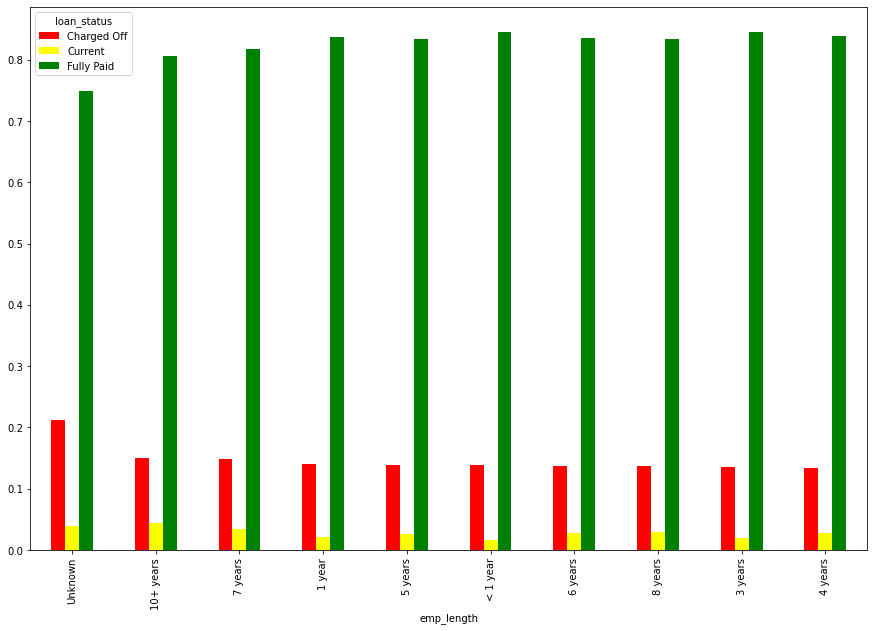

In [118]:
employee_data = data.groupby(['emp_length'])['loan_status'].value_counts(normalize=True).unstack()
employee_data = employee_data.sort_values(by='Charged Off', ascending=False).head(10)
employee_data.plot.bar(figsize=(15, 10), color={"Charged Off": "red", "Current": "yellow", "Fully Paid":"green"})
plt.show()

In [119]:
### Employment unknown has high percentage of charge off

<AxesSubplot:xlabel='emp_length', ylabel='int_rate'>

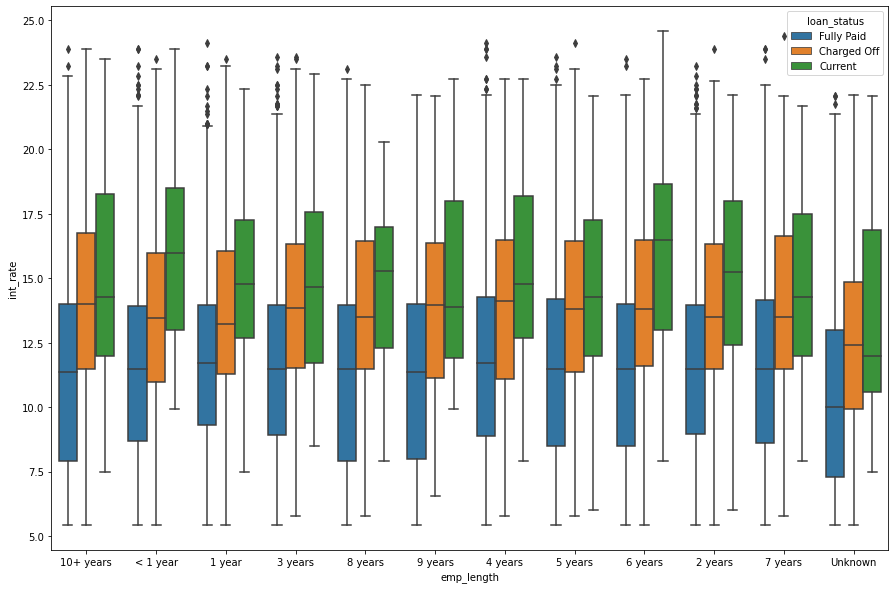

In [120]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data.emp_length, y=data.int_rate, hue=data.loan_status)

In [121]:
cont_data.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162
std,7456.670694,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000
50%,10000.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000
75%,15000.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


In [122]:
cont_data.shape

(39717, 20)

In [123]:
cont_data['loan_status'] = data.loan_status
cont_data['int_rate'] = data.int_rate

In [124]:
def quantify(x):
    if x == 'Charged Off':
        return 2
    if x == 'Fully Paid':
        return 1
    if x == 'Current':
        return 0
cont_data['loan_status_quantify'] = cont_data.loan_status.apply(lambda x : quantify(x))

<AxesSubplot:>

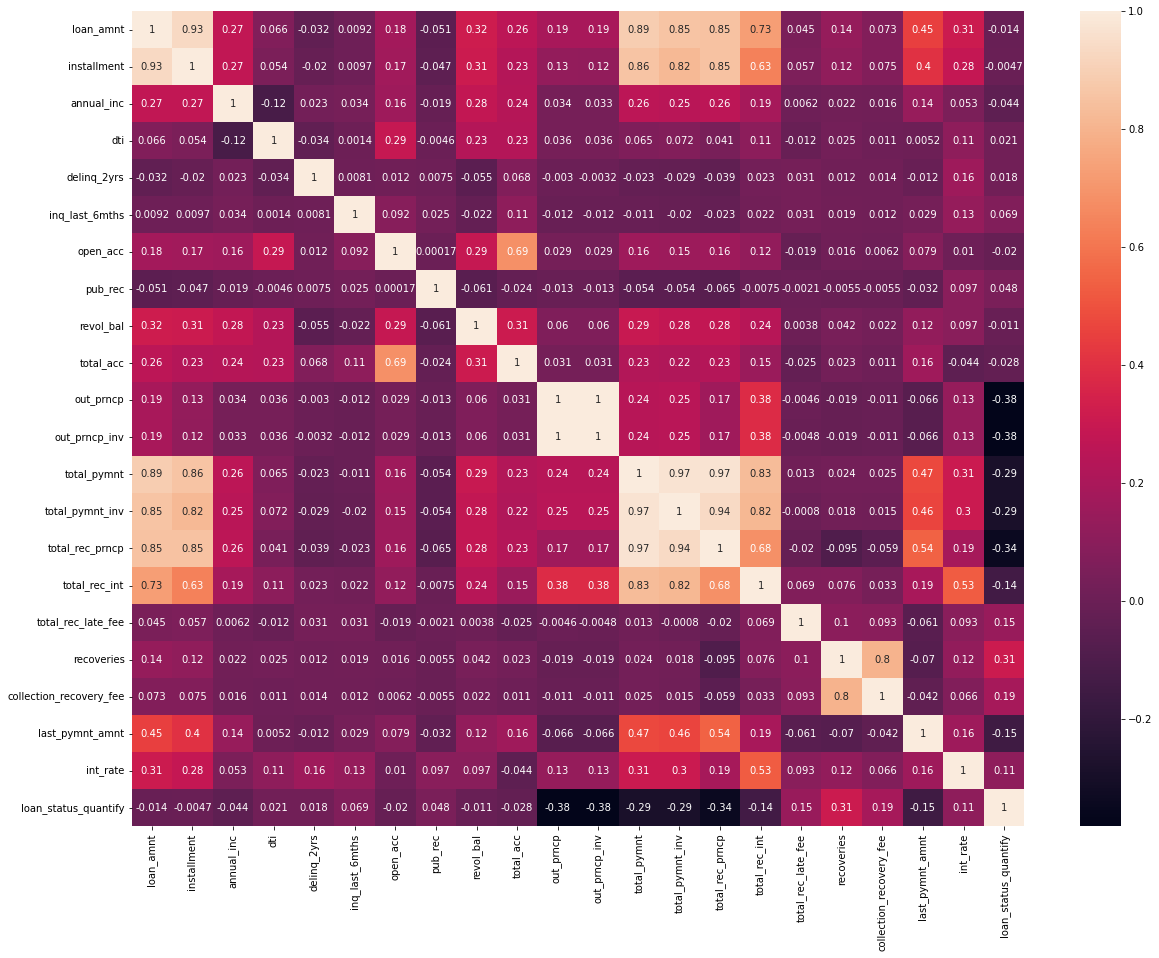

In [125]:
plt.figure(figsize=(20,15))
sns.heatmap(cont_data.corr(), annot=True)

<AxesSubplot:xlabel='total_rec_prncp', ylabel='pub_rec'>

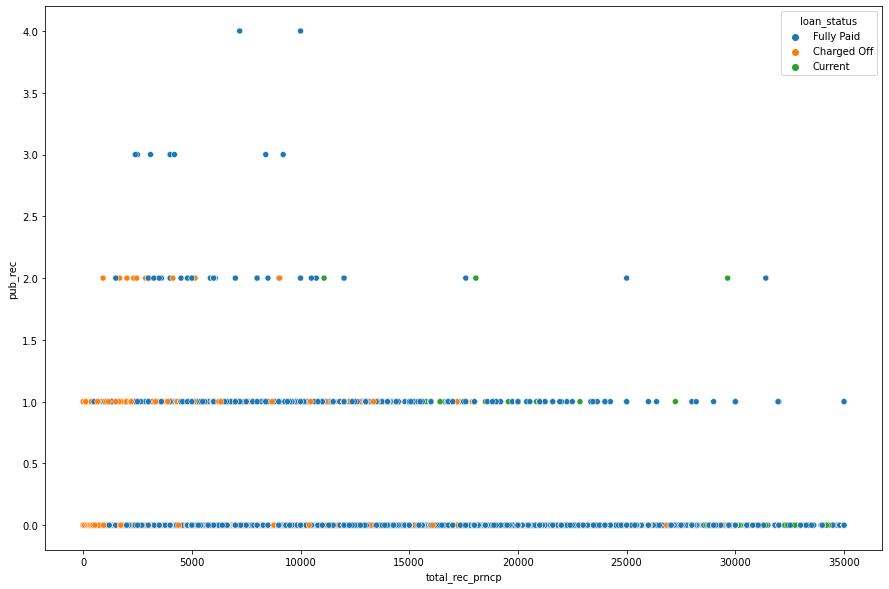

In [126]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=cont_data.total_rec_prncp, y = cont_data.pub_rec, hue=data.loan_status)

<AxesSubplot:xlabel='pub_rec'>

<Figure size 1080x720 with 0 Axes>

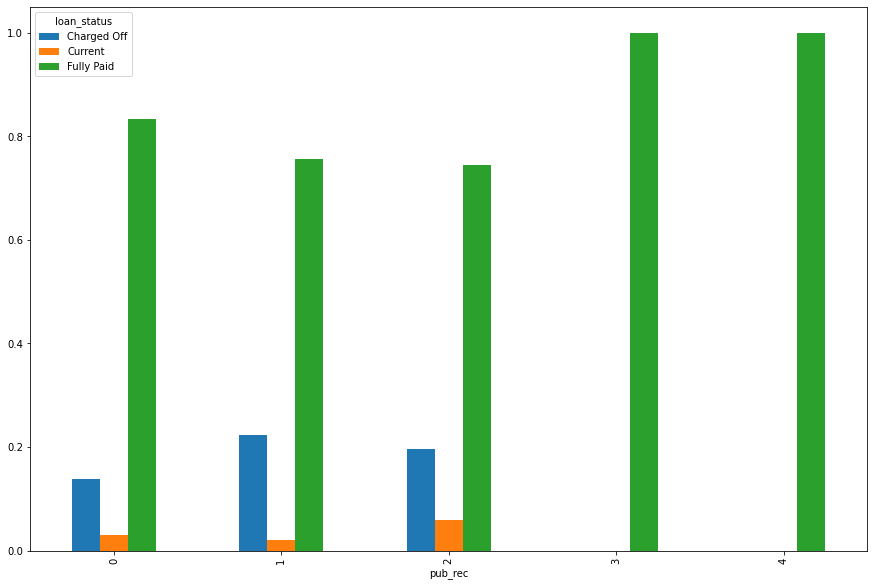

In [127]:
plt.figure(figsize=(15,10))
cont_data.groupby(['pub_rec'])['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(15,10))

<AxesSubplot:>

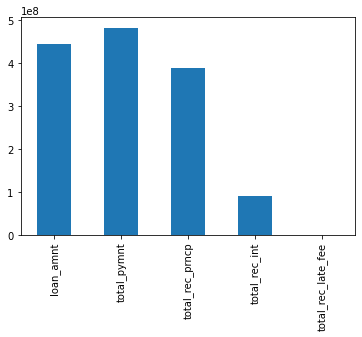

In [128]:
cont_data[['loan_amnt', 'total_pymnt','total_rec_prncp','total_rec_int', 'total_rec_late_fee']].sum().plot.bar()

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

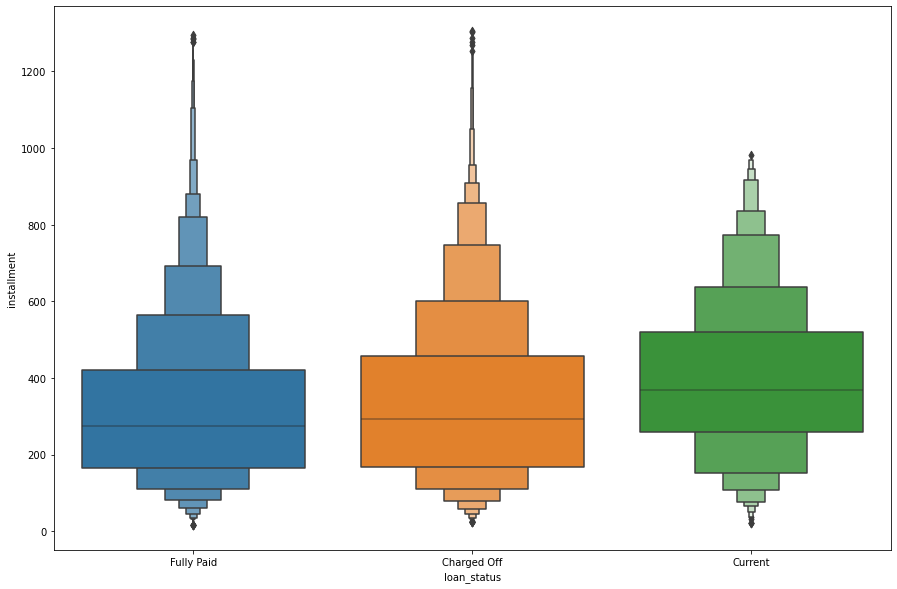

In [129]:
plt.figure(figsize=(15,10))
sns.boxenplot(x=cont_data.loan_status, y=cont_data.installment)

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

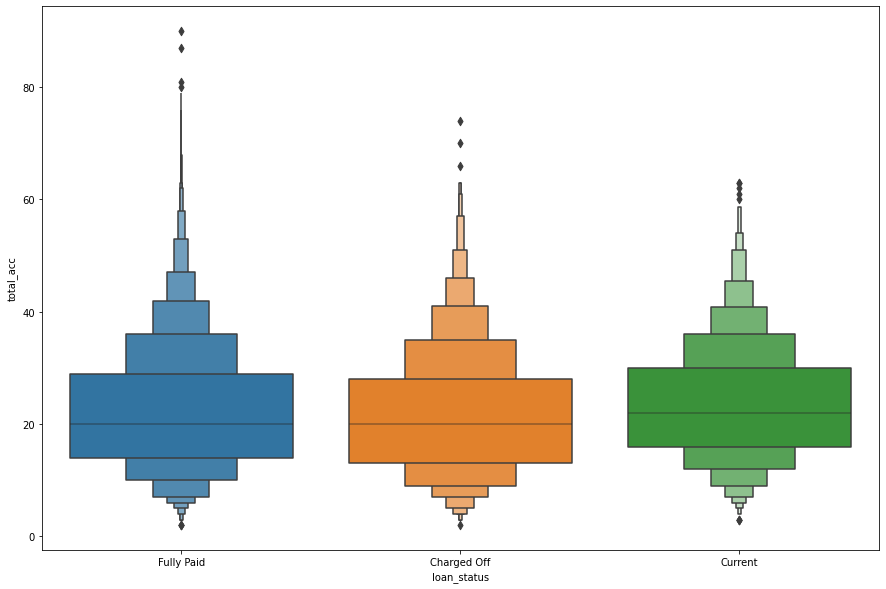

In [130]:
plt.figure(figsize=(15,10))
sns.boxenplot(x=cont_data.loan_status, y=cont_data.total_acc)

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate'>

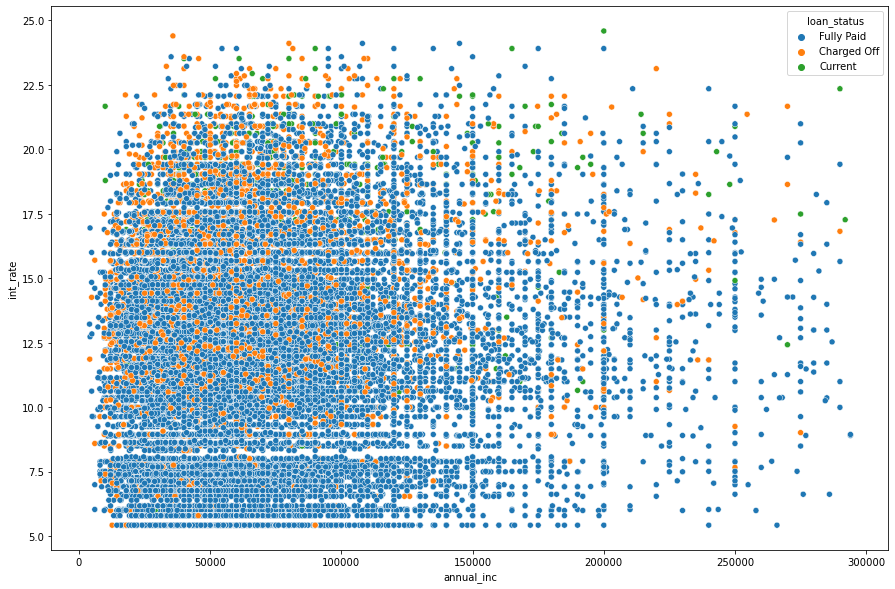

In [131]:
plt.figure(figsize=(15,10))
cont_data = cont_data[cont_data.annual_inc<300000]
sns.scatterplot(x=cont_data.annual_inc, y=cont_data.int_rate, hue=cont_data.loan_status)

In [132]:
cont_data.annual_inc.value_counts(bins=10)

(33000.0, 62000.0]      16460
(62000.0, 91000.0]       9987
(3709.999, 33000.0]      5624
(91000.0, 120000.0]      4368
(120000.0, 149000.0]     1482
(149000.0, 178000.0]      829
(178000.0, 207000.0]      429
(207000.0, 236000.0]      149
(236000.0, 265000.0]      106
(265000.0, 294000.0]       60
Name: annual_inc, dtype: int64

In [133]:
cont_data.inq_last_6mths.unique()

array([1, 5, 2, 0, 3, 4, 6, 7, 8], dtype=int64)

<AxesSubplot:xlabel='inq_last_6mths', ylabel='int_rate'>

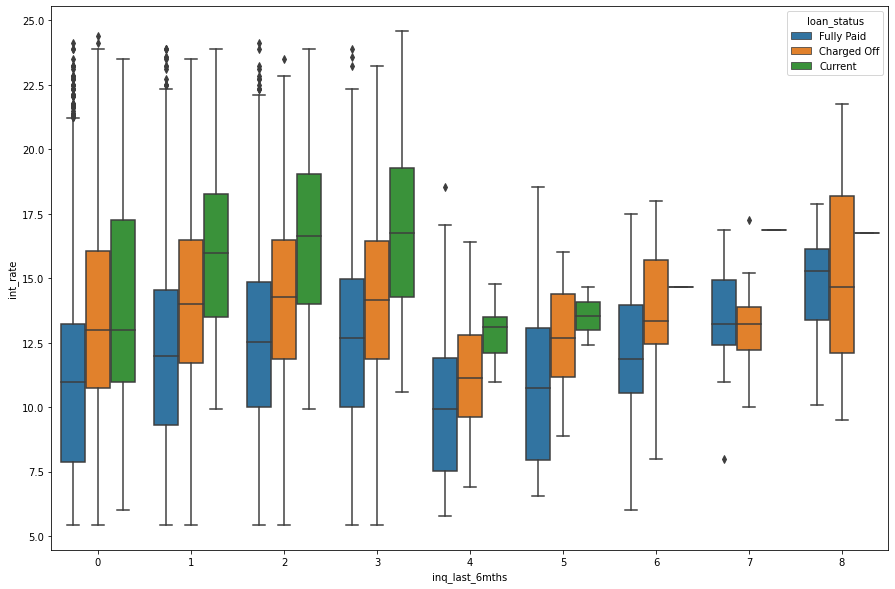

In [134]:
plt.figure(figsize=(15,10))
sns.boxplot(x=cont_data.inq_last_6mths, y=cont_data.int_rate, hue=cont_data.loan_status)

<AxesSubplot:xlabel='inq_last_6mths'>

<Figure size 1080x720 with 0 Axes>

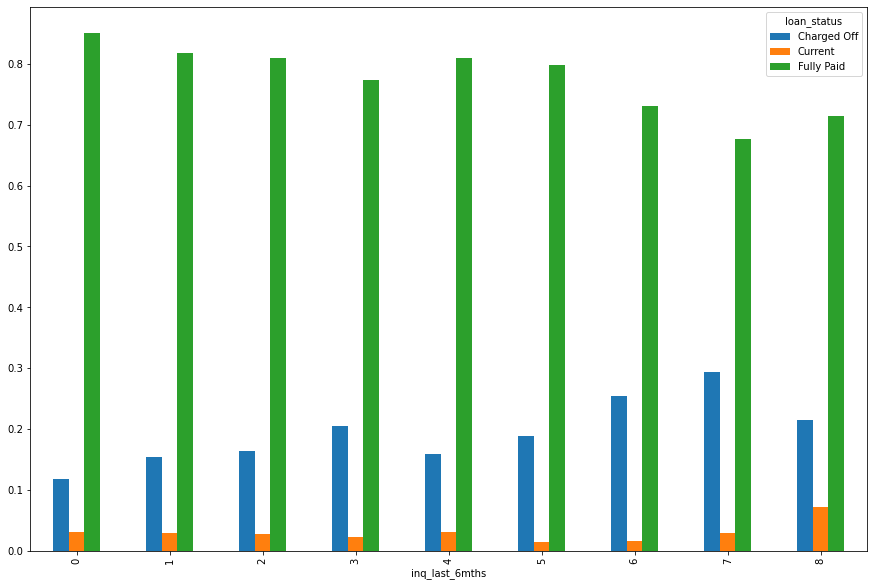

In [135]:
plt.figure(figsize=(15,10))
cont_data.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True).unstack().plot.bar(figsize=(15,10))